### **INTRODUCTION**

**521251S Data Mining Project**  
**Spring 2023**

**TOPIC**  
Prediction of traffic, driving style and road surface condition  

**RESEARCHER**  
*Sameera Gamage*

**MENTOR**  
*Henna Tiensuu* 

**FILES**  
*DATA/opel_corsa_01.csv*  
*DATA/opel_corsa_02.csv*  
*DATA/peugeot_207_01.csv*  
*DATA/peugeot_207_02.csv*  
*REPORT.PDF*  
*README.md*

### **IMPLEMENTATION**

##### **LIBRARIES**

In [1]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# PREPROCESSING
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# PERFORMANCE AND CROSS-VALIDATION
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

##### **DATA INTEGRATION AND CLEANING**

File (DATA\opel_corsa_01.csv) was read successfully (NumSamples = 7392)!
File (DATA\opel_corsa_02.csv) was read successfully (NumSamples = 4328)!
File (DATA\peugeot_207_01.csv) was read successfully (NumSamples = 8614)!
File (DATA\peugeot_207_02.csv) was read successfully (NumSamples = 4623)!

NumSamples (Total) = 24957

Data loss if samples including any NaN values are removed: 4.76 %

NumSamples (After pre-processing) = 23770


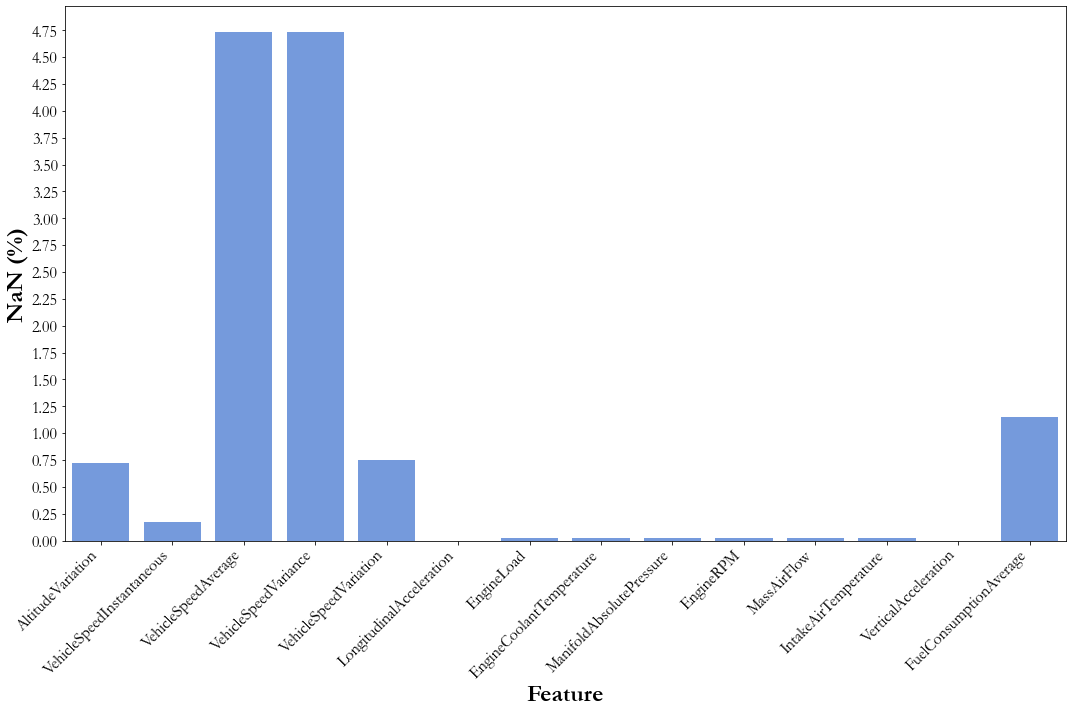

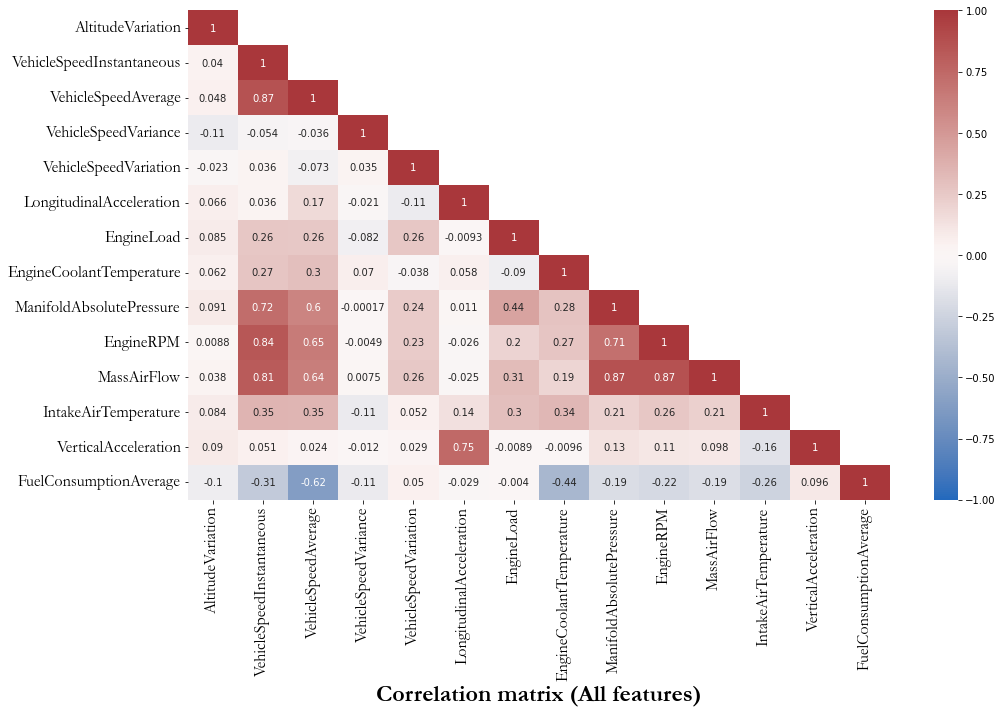

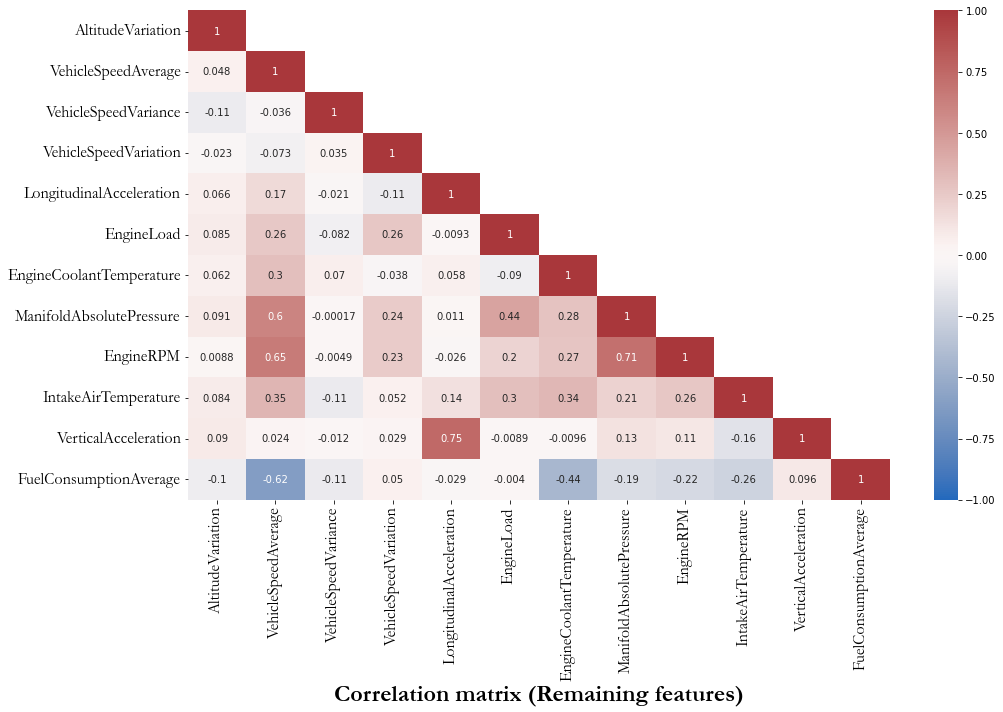

In [2]:
# INITIALIZE A LIST STRINGS DESCRIBING ORIGINAL FILENAMES
files = ["DATA\opel_corsa_01.csv", "DATA\opel_corsa_02.csv", "DATA\peugeot_207_01.csv", "DATA\peugeot_207_02.csv"]

# INITIALIZE EMPTY DATAFRAME FOR ALL DATA
data = pd.DataFrame()

# READ COLUMNS FROM FIRST FILE AND USE THEM FOR COMPARISON LATER
cols = pd.read_csv(files[0], sep=";").columns.values

for file in files:

    # BEFORE CONTENATION, CHECK THAT THE COLUMNS MATCH
    if np.all(pd.read_csv(file, sep=";").columns.values == cols):

        # READ RAW CSV INTO A DATAFRAME
        df = pd.read_csv(file, sep=";", decimal=",")

        # PRINT INFORMATION
        print("File (%s) was read successfully (NumSamples = %d)!" % (file, len(df.index)))

        # REMOVE ROWS WITH ANY NAN VALUES AND CONCATENATE IT
        data = pd.concat([data, df], axis=0)

# PRINT INFORMATION
print("\nNumSamples (Total) = %d" % len(data.index))

# INITIALIZE LIST OF STRINGS FOR LABELS AND FEATURES
labels = ["traffic", "drivingStyle", "roadSurface"]
features = [col for col in data.columns.values if col not in labels]

# PLOT A BARPLOT OF THE PROPORTIONS OF NAN VALUES AND MAKE NECESSARY VISUAL CHANGES
fig1 = plt.figure(figsize=(15,10))
ax1 = sns.barplot(x=features, y=[(np.sum(data[feature].isna()) / len(data[features].index))*100 for feature in features], color="cornflowerblue")
ax1.set_xlabel("Feature", fontsize=24, fontweight="bold", fontname="Garamond")
ax1.set_ylabel("NaN (%)", fontsize=24, fontweight="bold", fontname="Garamond")
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.locator_params(axis='y', nbins=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=16)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Garamond")

# PLOT THE CORRELATION MATRIX WITH ALL FEATURES
fig2 = plt.figure(figsize=(15,10))
ax2 = sns.heatmap(data[features].corr(), cmap="vlag", annot=True, vmin=-1, vmax=1, mask=np.triu(np.ones(np.shape(data[features].corr())), k=1))
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xlabel("Correlation matrix (All features)", fontsize=24, fontweight="bold", fontname="Garamond")
for tick in ax2.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Garamond")

# REMOVE FEATURES WITH HIGH CORRELATION WITH ANOTHER FEATURE OR LOTS OF NANS (VehicleSpeedAverage, )
features_to_remove = ["VehicleSpeedInstantaneous", "MassAirFlow"]
features = [feature for feature in features if feature not in features_to_remove]

# PLOT THE CORRELATION MATRIX AFTER REMOVING FEATURES
fig3 = plt.figure(figsize=(15,10))
ax3 = sns.heatmap(data[features].corr(), cmap="vlag", annot=True, vmin=-1, vmax=1, mask=np.triu(np.ones(np.shape(data[features].corr())), k=1))
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.set_xlabel("Correlation matrix (Remaining features)", fontsize=24, fontweight="bold", fontname="Garamond")
for tick in ax3.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Garamond")

# PRINT INFORMATION
print("\nData loss if samples including any NaN values are removed: %.2f %%" % (100 - ((len(data[features + labels].dropna(axis=0, how="any").index) / len(data[features + labels].index)*100))))

# HANDLE MISSING VALUES BY REMOVAL OF SAMPLES WITH ANY NANS
data = data[features + labels].dropna(axis=0, how="any").reset_index(drop=True)

# WINSORIZE (CLIP) VALUES BELOW 5TH PERCENTILE AND ABOVE 95TH PERCENTILE
label_df = data[labels]
feature_df = data[features].clip(data[features].quantile(0.05), data[features].quantile(0.95), axis=1)
data = pd.concat([feature_df, label_df], axis=1)

# EXTRACT FINAL X (FEATURES) AND FINAL Y (LABELS)
X = data[features]
Y = data[labels]

# PRINT INFORMATION
print("\nNumSamples (After pre-processing) = %d" % len(data.index))

# TIGHT LAYOUT FOR ALL FIGURES
fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

##### **VISUALIZATIONS**

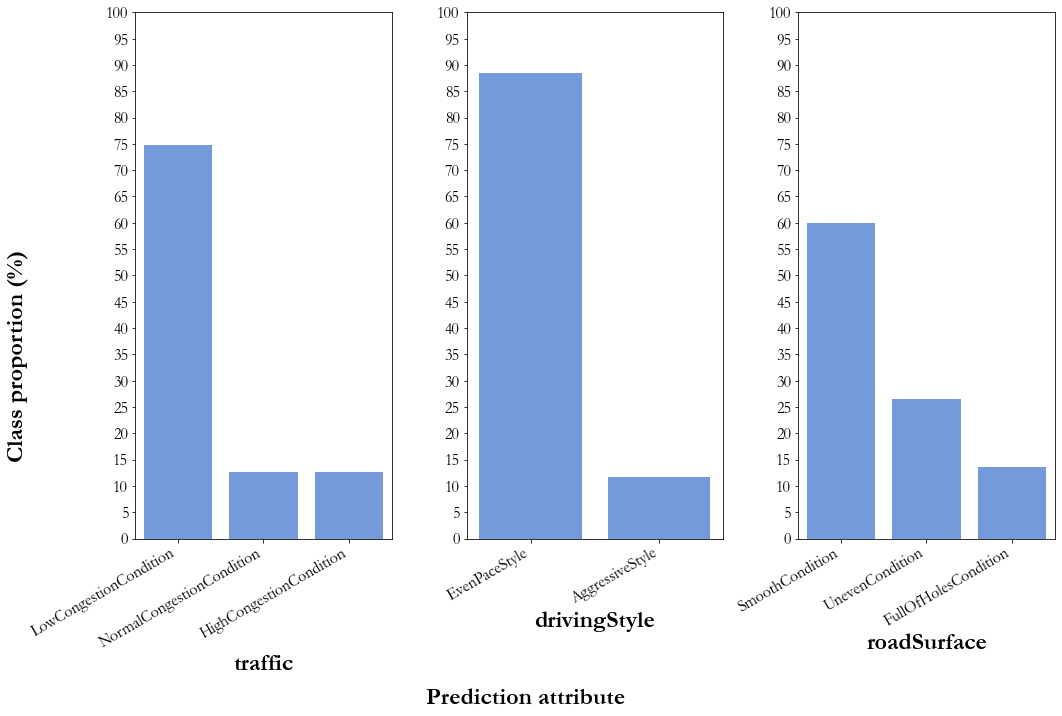

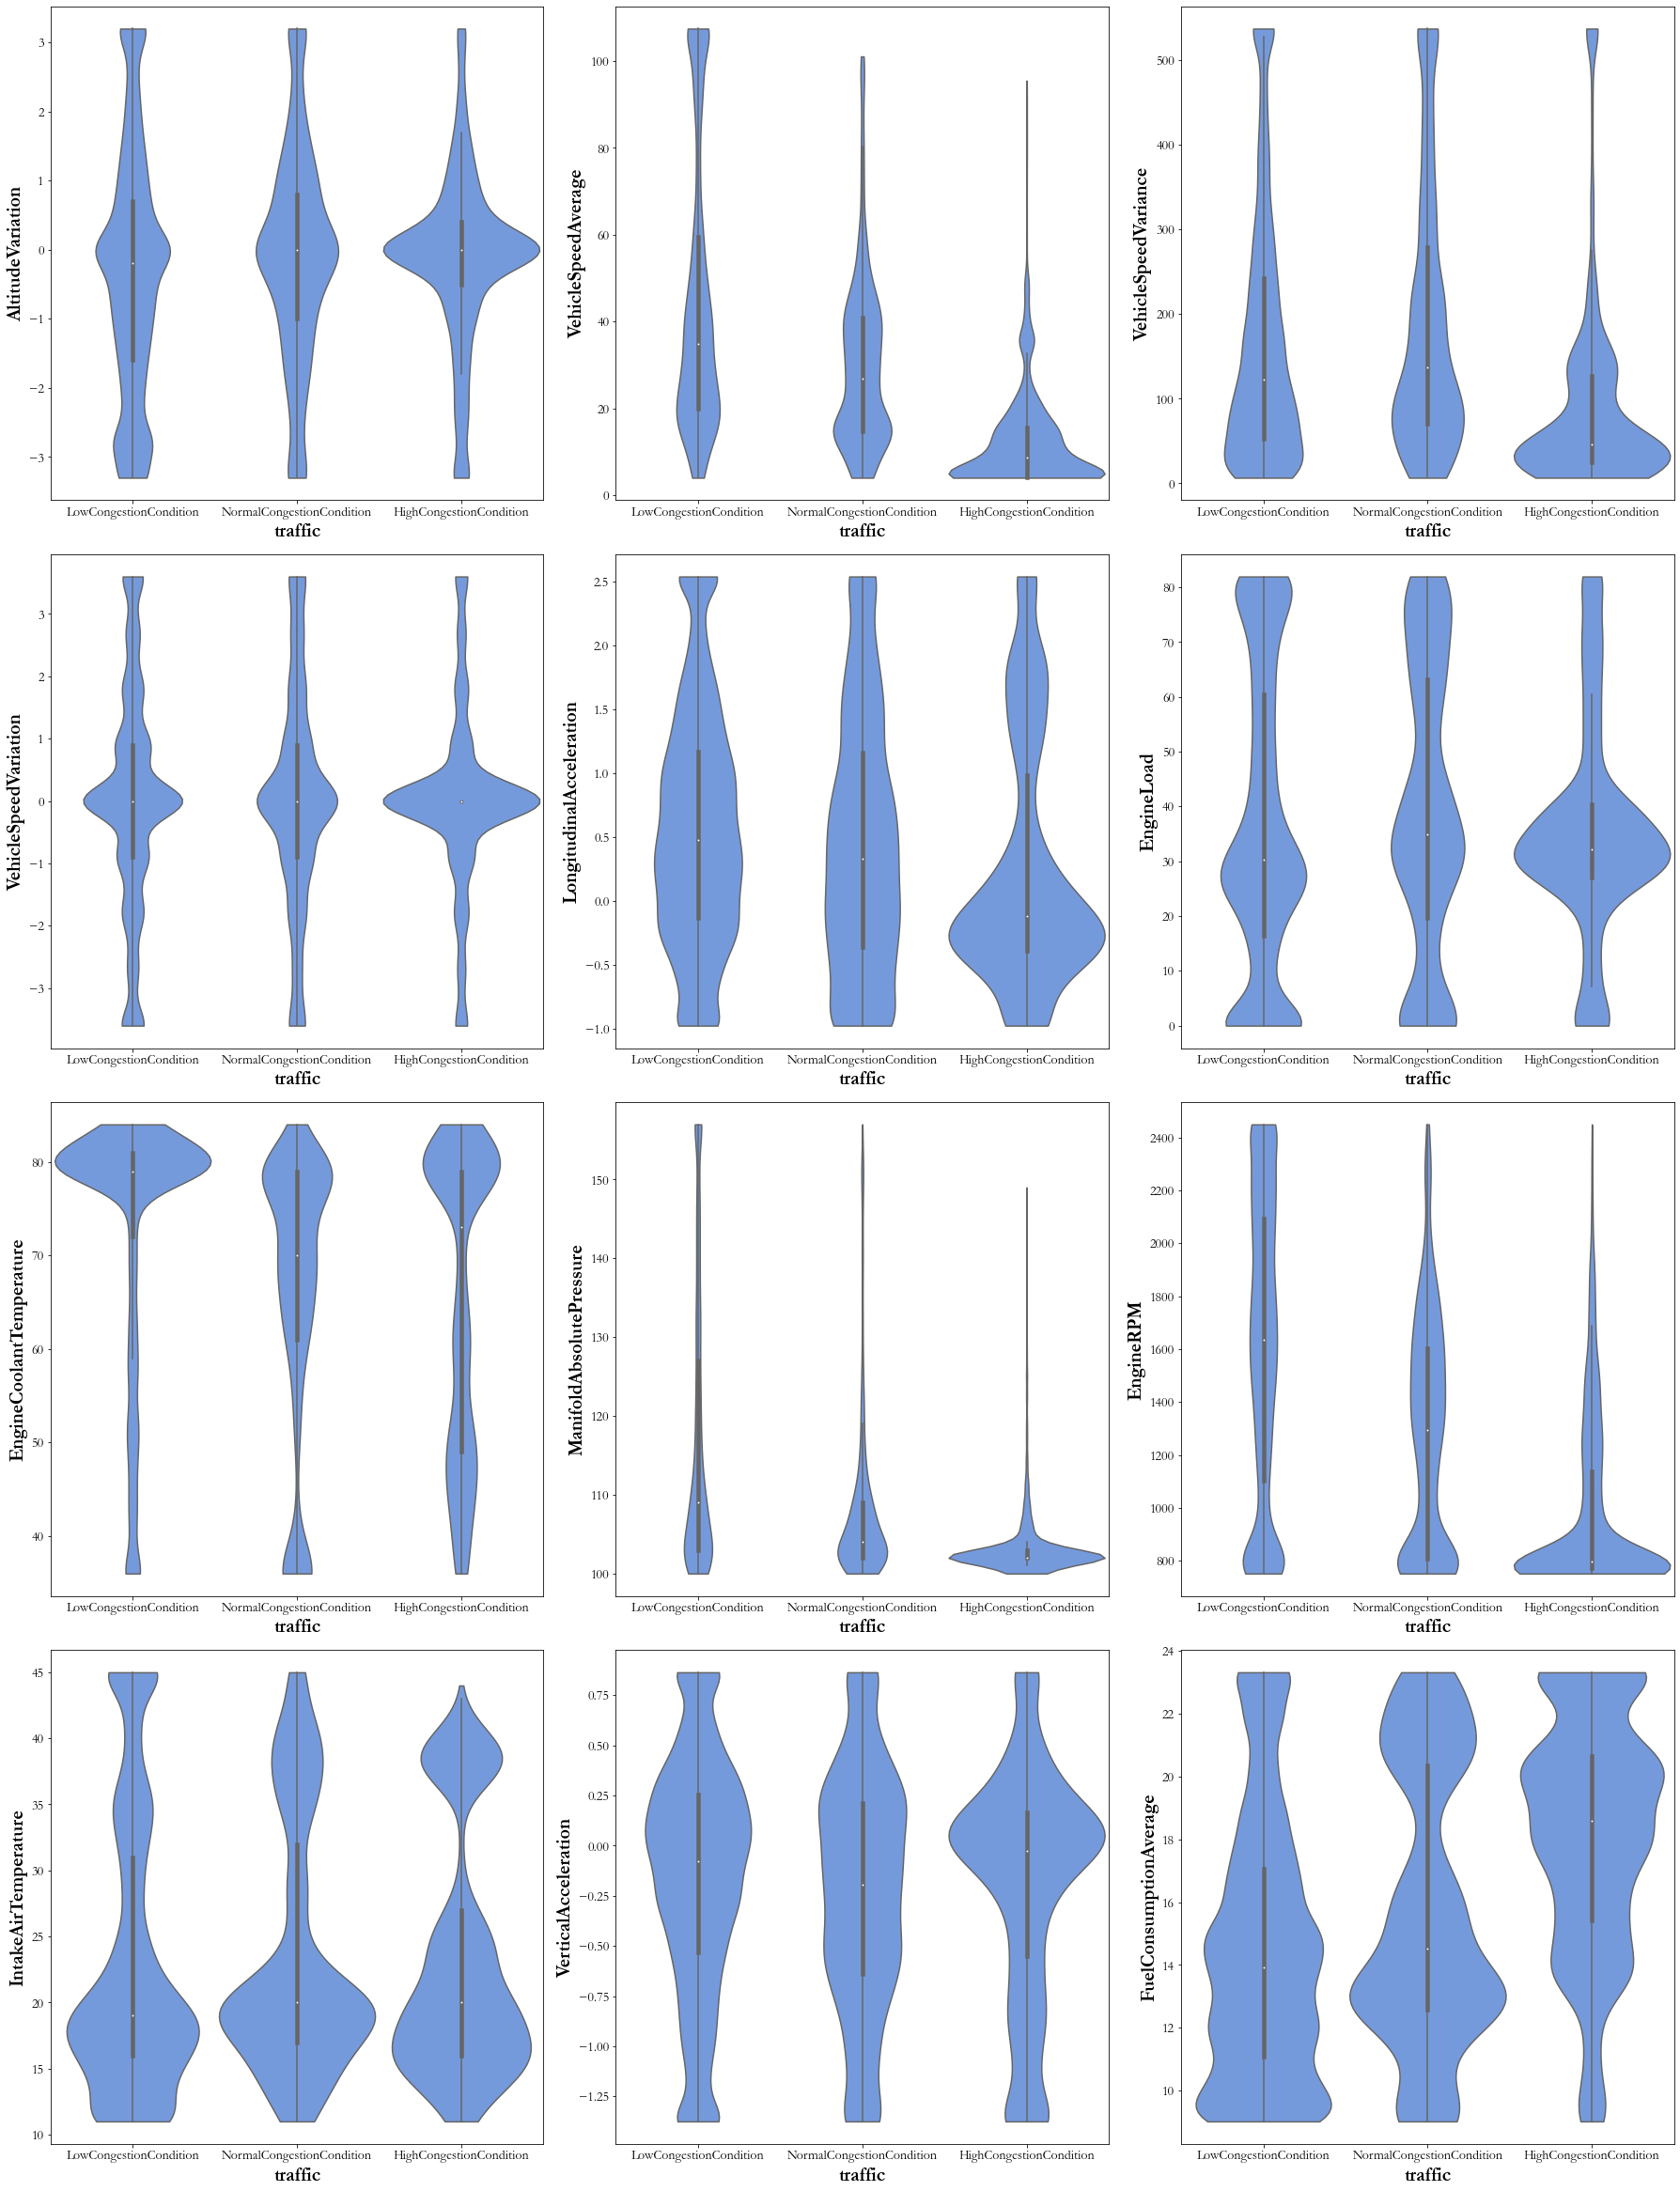

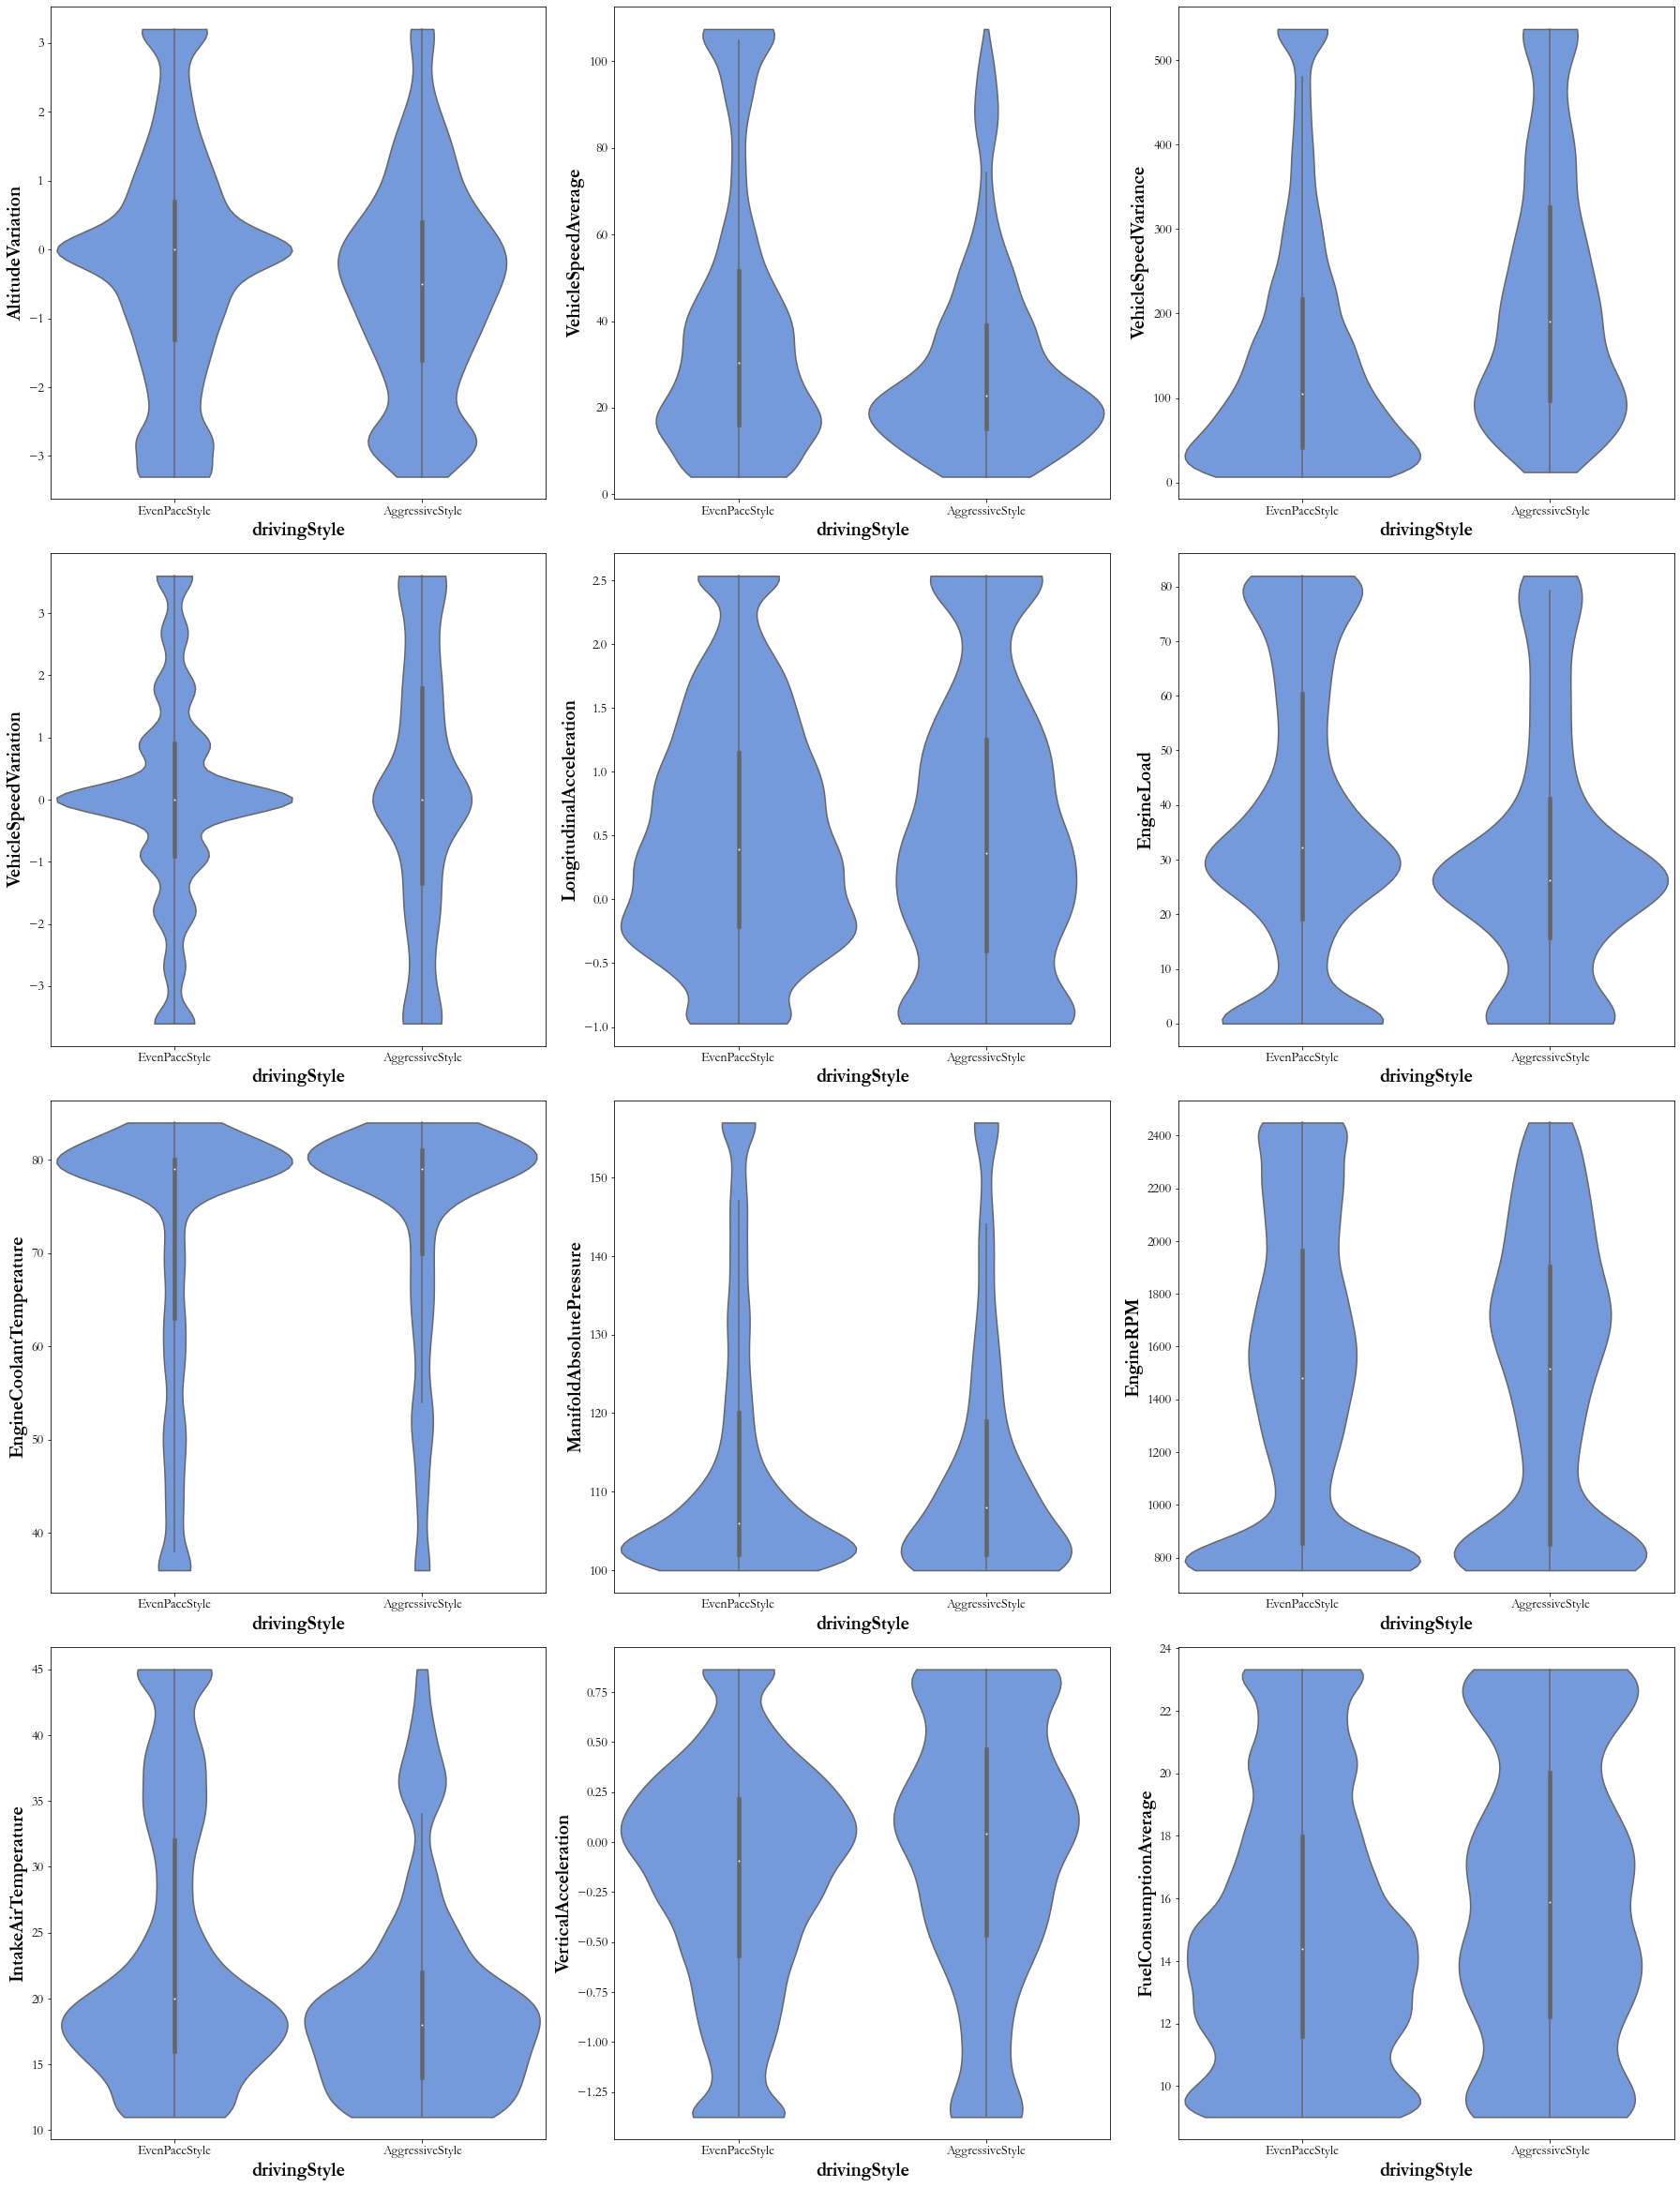

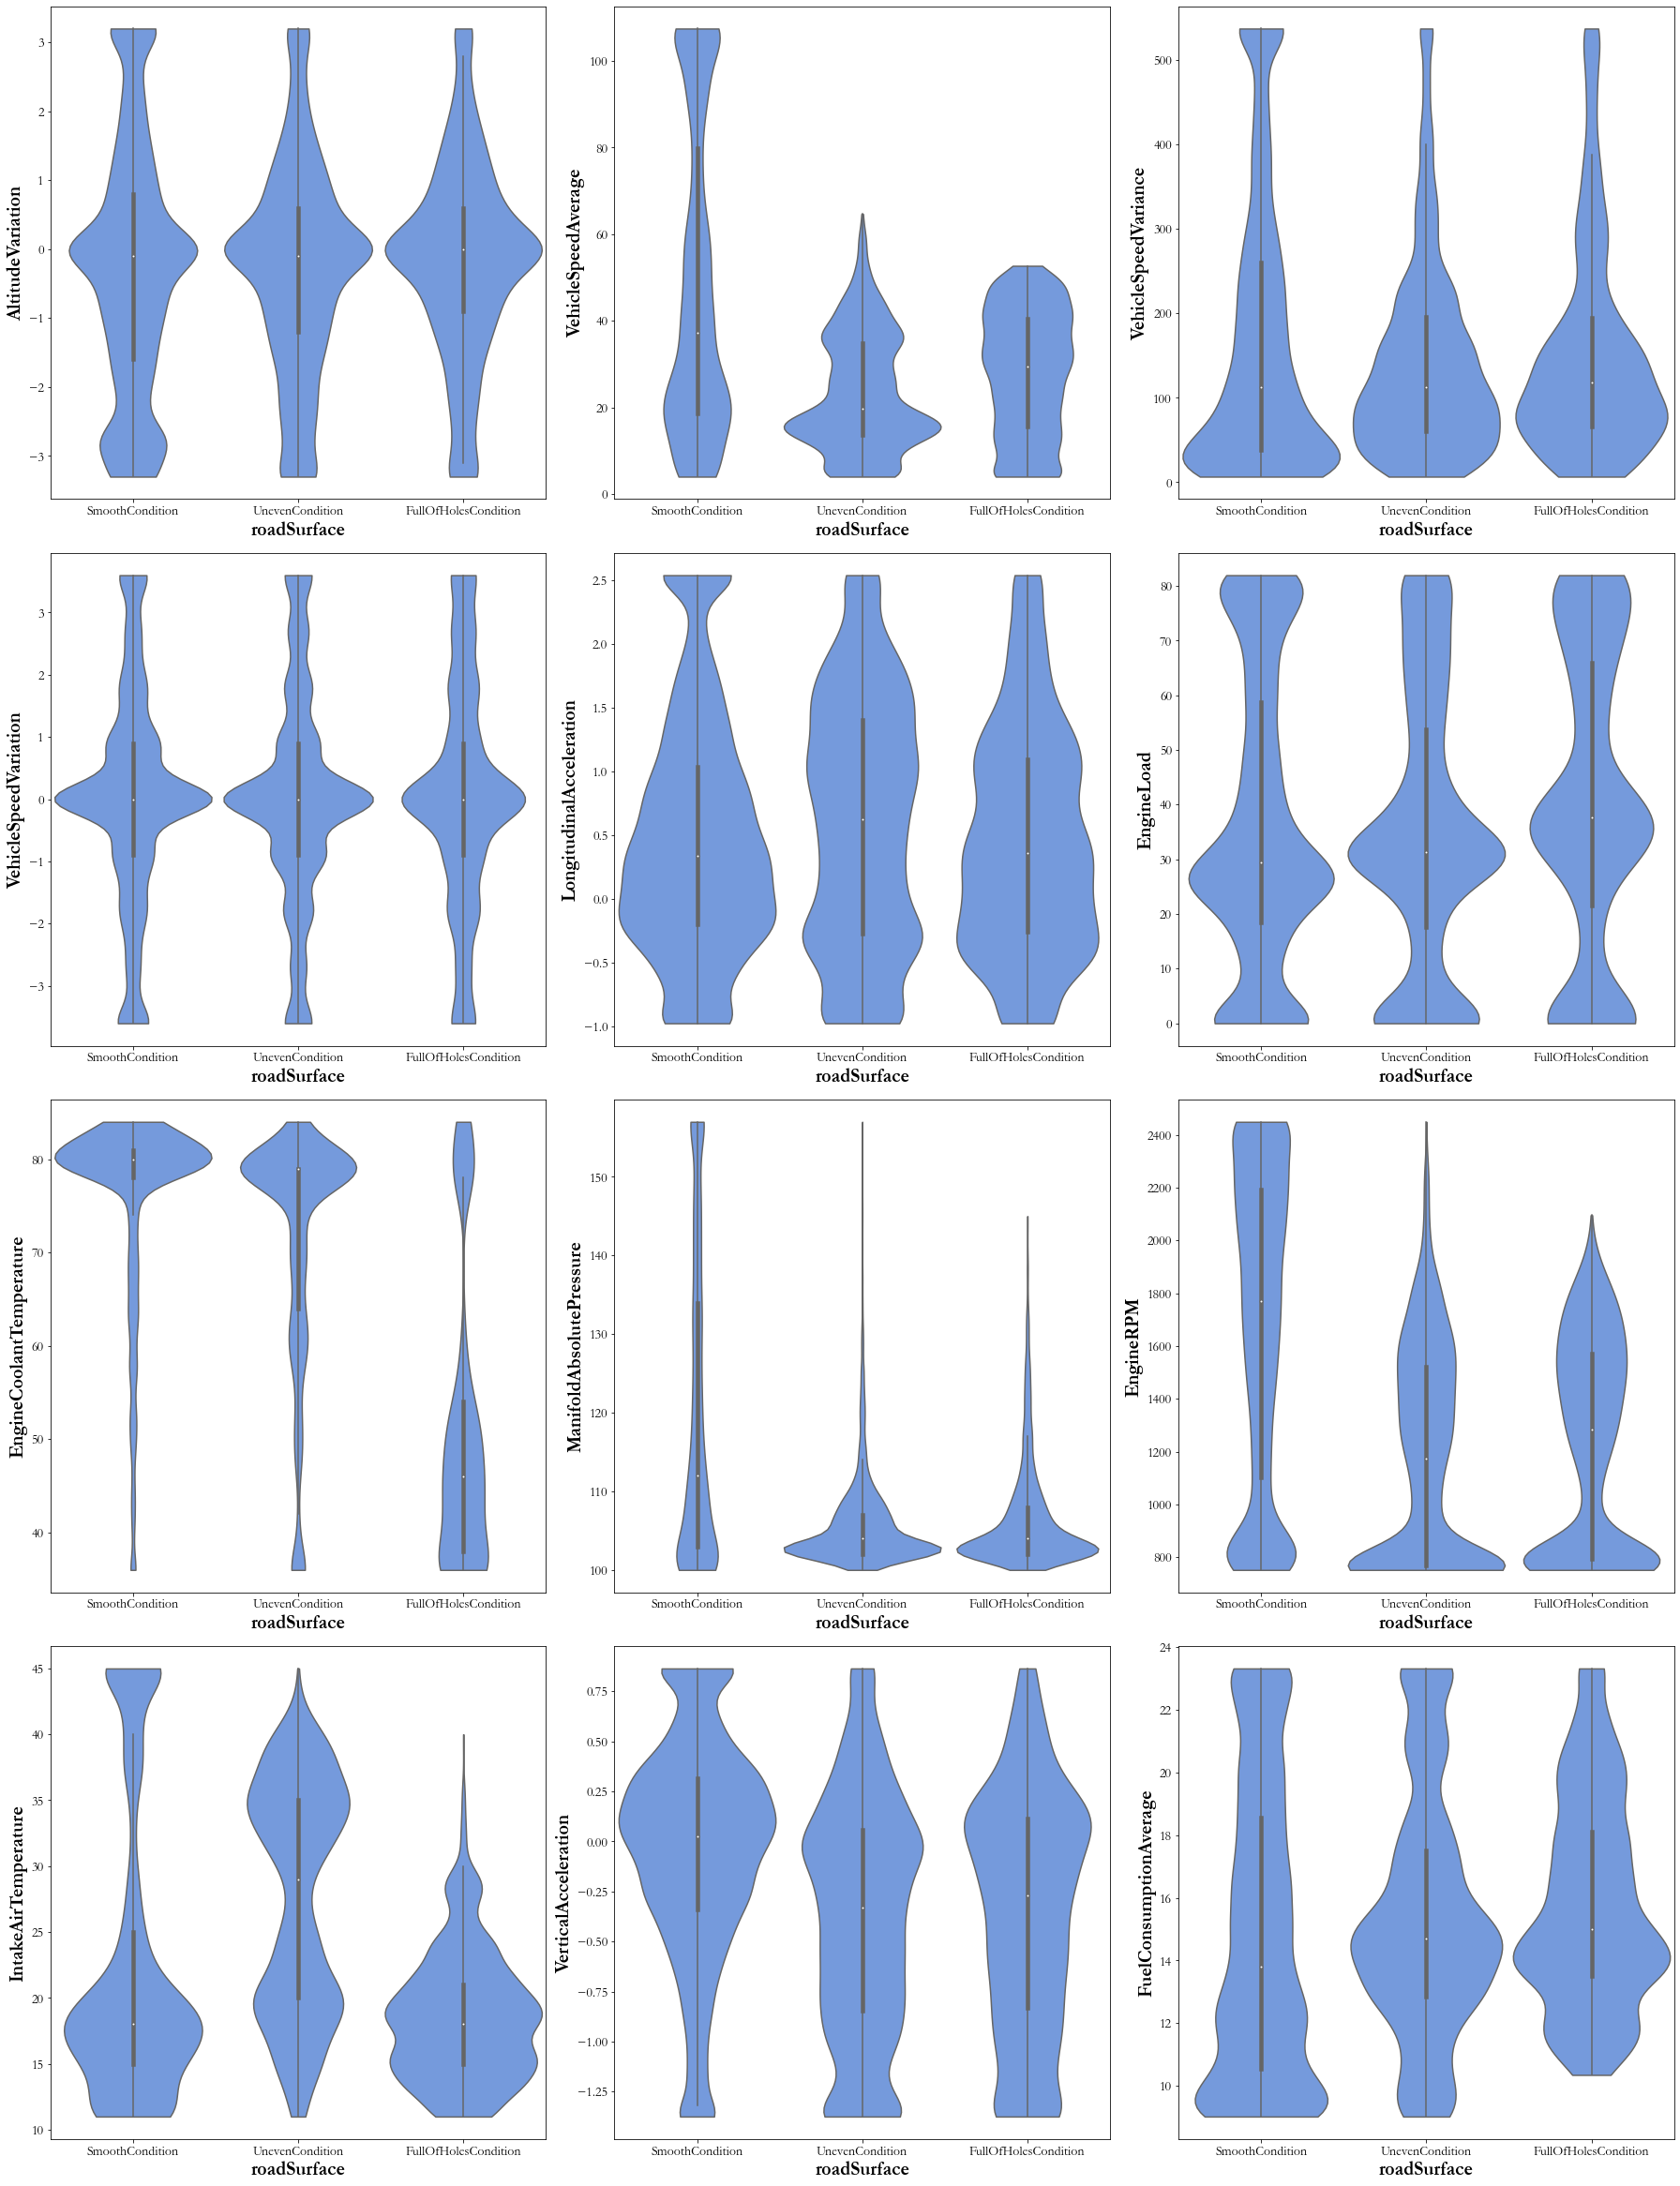

In [3]:
########## CLASS DISTRIBUTIONS ##########

# INITIALIZE FIGURE
fig4, ax4 = plt.subplots(1, len(labels), figsize=(15,10))
fig4.supylabel("Class proportion (%)", fontsize=24, fontweight="bold", fontname="Garamond")
fig4.supxlabel("Prediction attribute", fontsize=24, fontweight="bold", fontname="Garamond")

# LOOP THROUGH THE DIFFERENT PREDICTION ATTRIBUTES
for idx, label in enumerate(labels):

    # CREATE THE SUBPLOT AND MAKE NECESSARY VISUAL CHANGES
    sns.barplot(ax=ax4[idx], x=pd.unique(Y[label]), y=[(sum(Y[label] == category) / len(Y[label].index))*100 for category in pd.unique(Y[label])], color="cornflowerblue")
    ax4[idx].set_xlabel(label, fontsize=24, fontweight="bold", fontname="Garamond")
    ax4[idx].tick_params(axis='both', which='major', labelsize=16)
    ax4[idx].locator_params(axis='y', nbins=20)
    ax4[idx].set_ylim([0, 100])
    ax4[idx].set_xticklabels(ax4[idx].get_xticklabels(), rotation=30, ha="right", fontsize=16)
    for tick in ax4[idx].get_xticklabels():
        tick.set_fontname("Garamond")
    for tick in ax4[idx].get_yticklabels():
        tick.set_fontname("Garamond")

########## VIOLIN PLOTS FOR EACH FEATURE AND PREDICTION ATTRIBUTE ##########

# INITIALIZE LISTS AND VARIABLES
figs = []
axes = []
rows = 5
cols = 3

# LOOP THROUGH ALL THE LABELS
for label in labels:

    # CREATE FIGURE
    fig = plt.figure(figsize=(25,40))

    # ADD HANDLES TO FIGS AND AXES ARRAYS 
    figs.append(fig)

    # LOOP THROUGH ALL FEATURES
    row_idx = 0
    col_idx = 0
    for enum, feature in enumerate(features):

        # ADD SUBPLOT
        ax_new = fig.add_subplot(rows, cols, enum+1)

        axes.append(ax_new)

        # CREATE THE SUBPLOT AND MAKE NECESSARY VISUAL CHANGES
        sns.violinplot(ax=axes[-1], y=X[feature], x=Y[label], color="cornflowerblue", width=0.95, cut=0)
        axes[-1].set_xlabel(label, fontsize=20, fontweight="bold", fontname="Garamond")
        axes[-1].set_ylabel(feature, fontsize=20, fontweight="bold", fontname="Garamond")
        axes[-1].tick_params(axis='both', which='major', labelsize=14)
        axes[-1].locator_params(axis='y', nbins=10)
        axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=0, ha="center", fontsize=14, fontname="Garamond")
        for tick in axes[-1].get_xticklabels():
            tick.set_fontname("Garamond")
        for tick in axes[-1].get_yticklabels():
            tick.set_fontname("Garamond")
        
        # MOVE TO NEXT SUBPLOT ROW
        if col_idx == cols - 1:
            row_idx += 1
            col_idx = 0
        else:
            col_idx += 1

# TIGHT LAYOUT FOR ALL FIGURES
fig4.tight_layout()
for fig in figs:
    fig.tight_layout()



**RELEVANT FEATURES FOR TRAFFIC PREDICTION BASED ON VISUAL ASSESSMENT**

1. VehicleSpeedAverage
2. EngineCoolantTemperature
3. EngineRPM
4. FuelConsumptionAverage
5. LongitudinalAcceleration
6. VehicleSpeedVariance

**RELEVANT FEATURES FOR DRIVING STYLE PREDICTION BASED ON VISUAL ASSESSMENT**

1. VehicleSpeedAverage
2. VehicleSpeedVariance
3. FuelConsumptionAverage
4. VerticalAcceleration
5. LongitudinalAcceleration
6. EngineRPM

**RELEVANT FEATURES FOR ROAD SURFACE CONDITION PREDICTION BASED ON VISUAL ASSESSMENT**

1. VehicleSpeedAverage
2. EngineCoolantTemperature
3. EngineRPM
4. IntakeAirTemperature
5. FuelConsumptionAverage
6. ManifoldAbsolutePressure

##### **FUNCTIONS FOR PREDICTION ALGORITHMS**

In [4]:
def classification_results(f1, y_test, y_pred, modeltype):

    # F1-SCORES
    print("Macro-F1 (%s): %.3f ± %.3f" % (modeltype, np.mean(f1), np.std(f1)))

    # CONFUSION MATRICES
    _, ax1 = plt.subplots(figsize=(15,10))
    _ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", ax=ax1)

    ax1.set_xlabel(ax1.get_xlabel(), fontsize=24, fontweight="bold", fontname="Garamond")
    ax1.set_ylabel(ax1.get_ylabel(), fontsize=24, fontweight="bold", fontname="Garamond")
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right", fontsize=16)
    for tick in ax1.get_xticklabels():
        tick.set_fontname("Garamond")
    for tick in ax1.get_yticklabels():
        tick.set_fontname("Garamond")

    return

# K-FOLD CROSS VALIDATION FUNCTION FOR ALL MODELS
def k_fold_cv(X, y, classifier, hyperparameters, k, sample_weights):

    # INITIALIZE ARRAYS FOR PERFORMANCE METRICS
    f1scores = []
    y_tests = []
    y_preds = []

    # PRINT INFORMATION TO USER
    print("\nRunning K-fold CV (%s)!" % (classifier))

    skf = StratifiedKFold(n_splits=k, shuffle=True)

    # STRATIFIED K-FOLD FOR PERFORMANCE ASSESSMENT
    for train_idx, test_idx in skf.split(X, y):

        # TRAIN-TEST SPLIT FOR EACH FOLD
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]

        # SCALE DATA TO ZERO MEAN AND UNIT VARIANCE
        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

        # NESTED K-FOLD CROSS-VALIDATION TO FIND HYPERPARAMETERS BASED ON MICRO F1
        model = GridSearchCV(classifier, param_grid=hyperparameters, scoring="f1_macro", cv=5, n_jobs=-1, refit=True)

        # FIT
        if sample_weights.size == 0:
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train, sample_weight=sample_weights[train_idx])

        # PREDICT
        y_pred = model.predict(X_test)

        # COMPUTE PERFORMANCE METRICS AND APPEND THEM TO THE ARRAY
        f1scores.append(f1_score(y_test, y_pred, average="macro"))

        # APPEND THE LABELS TO ARRAYS FOR LATER USE
        y_tests.extend(y_test)
        y_preds.extend(y_pred)
    
    # PRINT INFORMATION TO USER
    print("Finished K-fold CV (%s)!" % (classifier))

    # INITIALIZE K-FOLD CROSS VALIDATION TO FIND BEST HYPERPARAMETERS FOR THE FINAL MODEL
    model = GridSearchCV(classifier, param_grid=hyperparameters, scoring="f1_macro", cv=5, n_jobs=-1, refit=True)

    # FIT FINAL MODEL WITH ALL DATA
    #if sample_weights.size == 0:
    #    model.fit(X, y)
    #else:
    #    model.fit(X, y, sample_weight=sample_weights)

    return f1scores, model, y_tests, y_preds

# LOGISTIC REGRESSION WITH MONTE CARLO (REPEATED RANDOM SUB-SAMPLING) CROSS VALIDATION
def logistic_regression_cv(X, y, k, w):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "class_weight": w,
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["newton-cholesky"],
        "penalty": ["l2"],
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, LogisticRegression(), grid, k, np.array([]))

def decision_tree_cv(X, y, k, w):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "class_weight": w
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, DecisionTreeClassifier(), grid, k, np.array([]))

def gaussian_naive_bayes_cv(X, y, k, w):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "var_smoothing": np.logspace(-9, 0)
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, GaussianNB(), grid, k, w)

def knn_cv(X, y, k):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "n_neighbors": np.arange(1, 51, 1),
        "weights": ["distance"],
        "metric": ["minkowski"]
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, KNeighborsClassifier(), grid, k, np.array([]))

def svm_cv(X, y, k, w):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "class_weight": w,
        "kernel": ["rbf"],
        "C": [1],
        "gamma": [1]
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, SVC(), grid, k, np.array([]))

def randomforest_cv(X, y, k, w):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "class_weight": w,
        "n_estimators": [100, 200, 300]
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, RandomForestClassifier(), grid, k, np.array([]))

def mlp_cv(X, y, k):

    # INITIALIZE HYPERPARAMETERS
    grid = {
        "hidden_layer_sizes": [(100,), (200,), (300,)],
        "solver": ["sgd"],
        "learning_rate": ["adaptive"]
    }

    # RUN K-FOLD CROSS VALIDATION AND RETURN RESULTS
    return k_fold_cv(X, y, MLPClassifier(), grid, k, np.array([]))


##### **TRAFFIC PREDICTION**


Running K-fold CV (LogisticRegression())!
Finished K-fold CV (LogisticRegression())!

Running K-fold CV (DecisionTreeClassifier())!
Finished K-fold CV (DecisionTreeClassifier())!

Running K-fold CV (GaussianNB())!
Finished K-fold CV (GaussianNB())!

Running K-fold CV (SVC())!
Finished K-fold CV (SVC())!

Running K-fold CV (KNeighborsClassifier())!
Finished K-fold CV (KNeighborsClassifier())!

Running K-fold CV (RandomForestClassifier())!
Finished K-fold CV (RandomForestClassifier())!

Running K-fold CV (MLPClassifier())!


c:\Users\jnorrena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jnorrena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jnorrena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jnorrena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Finished K-fold CV (MLPClassifier())!
Macro-F1 (Logistic regression): 0.493 ± 0.002
Macro-F1 (Decision tree): 0.954 ± 0.002
Macro-F1 (Gaussian Naive Bayes): 0.459 ± 0.008
Macro-F1 (SVM): 0.941 ± 0.002
Macro-F1 (kNN): 0.965 ± 0.010
Macro-F1 (Random Forest): 0.982 ± 0.002
Macro-F1 (MLP): 0.667 ± 0.010


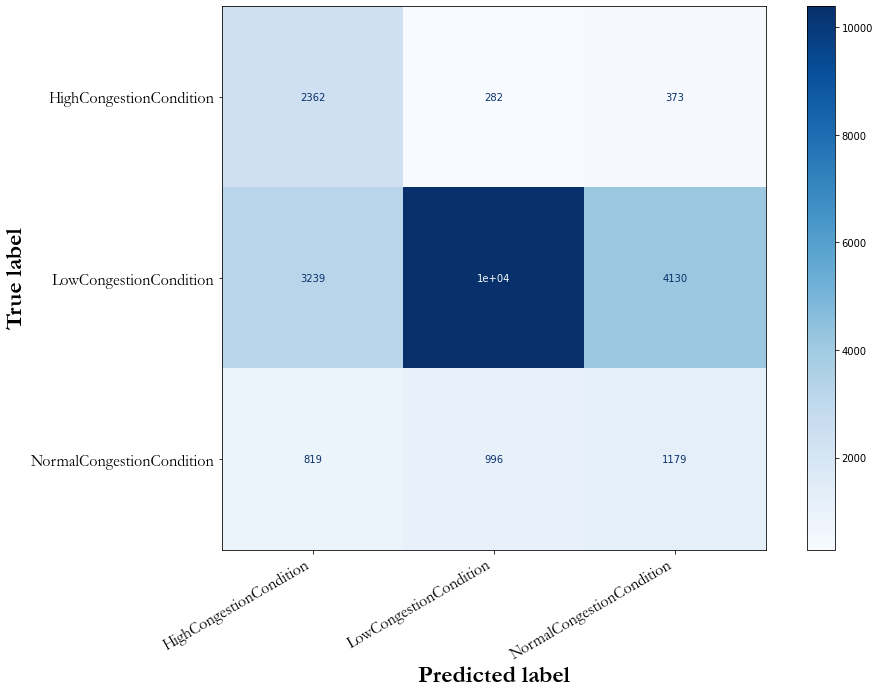

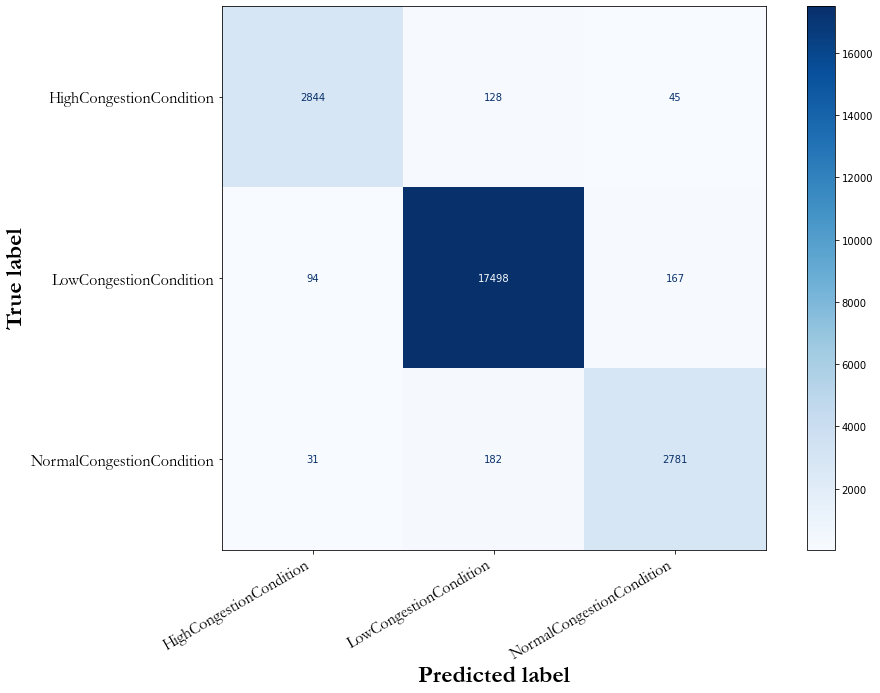

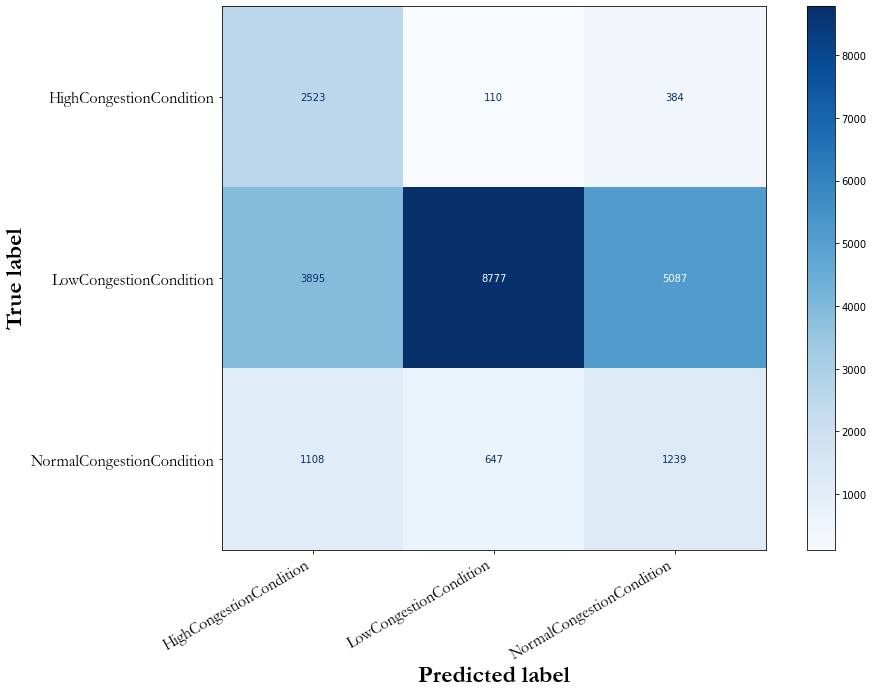

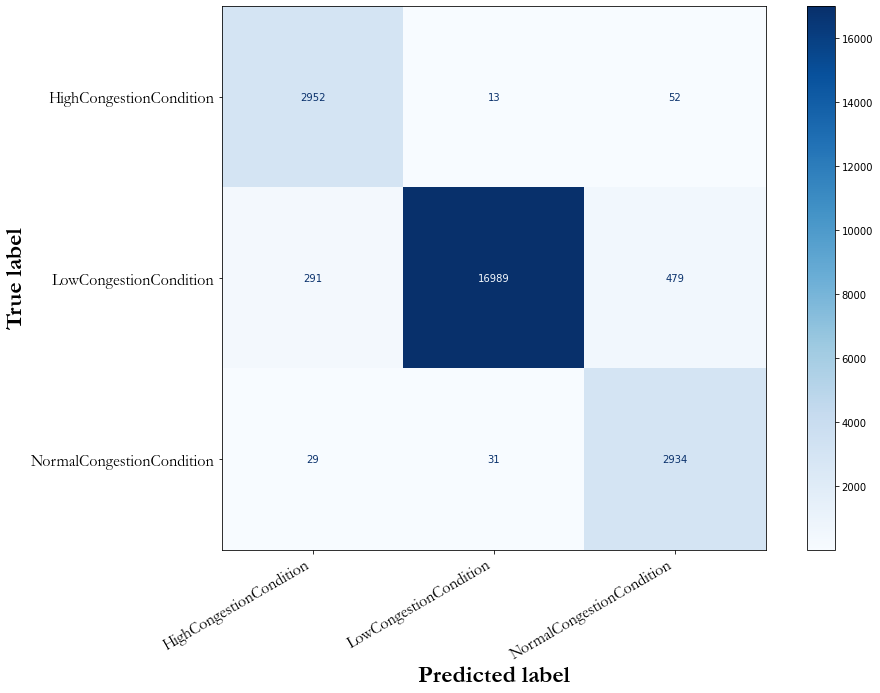

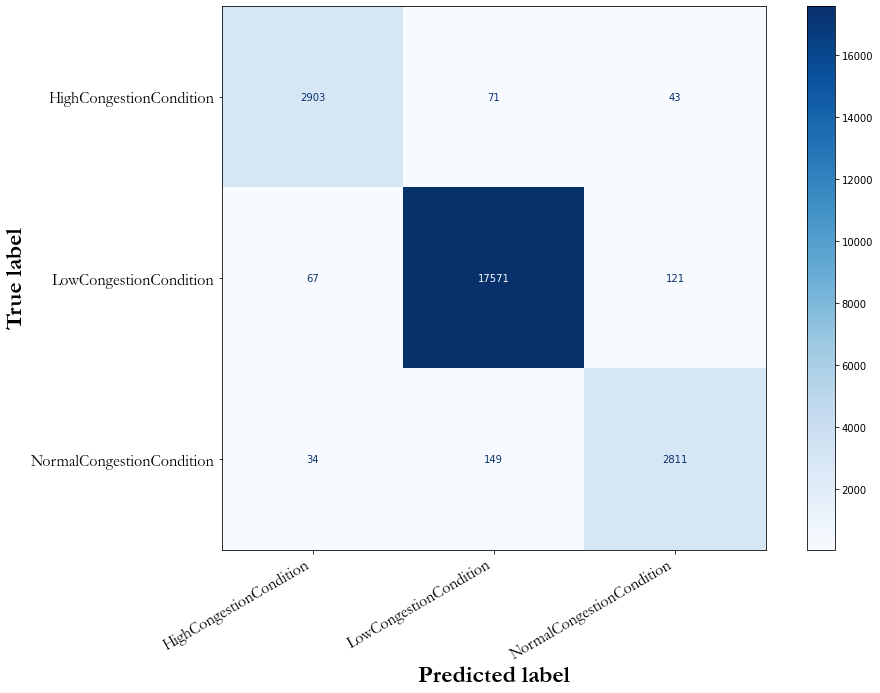

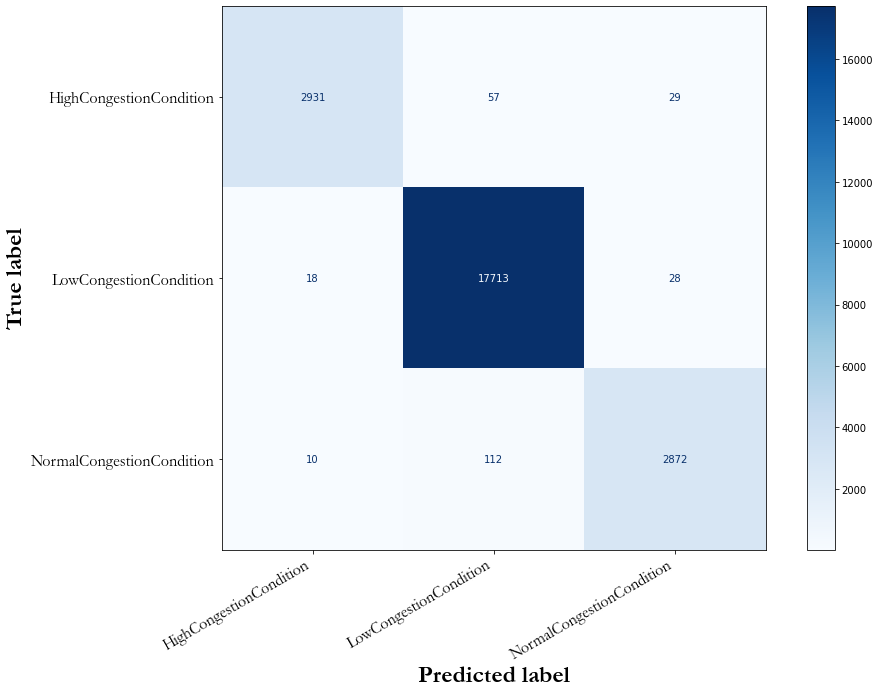

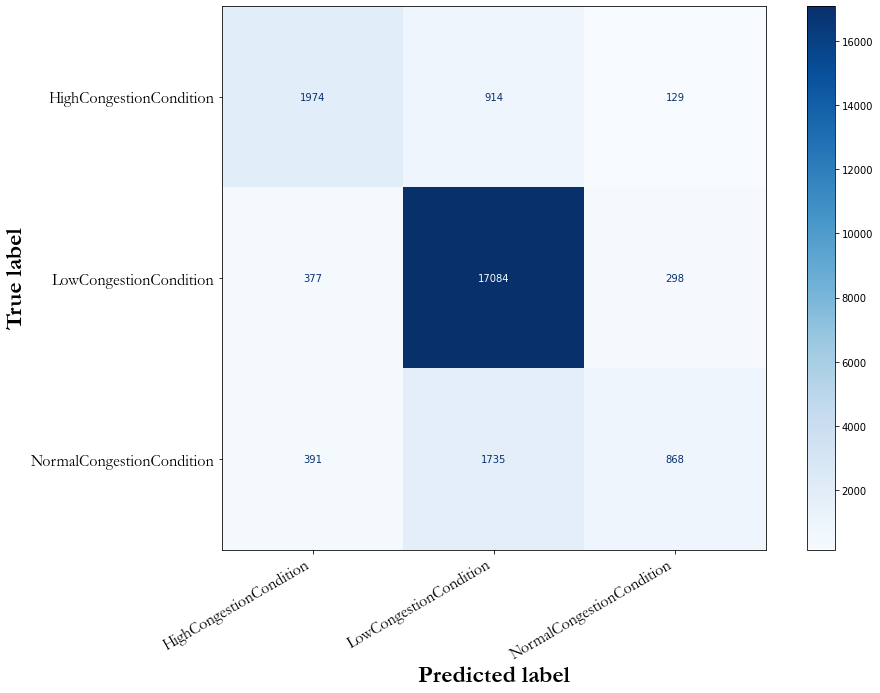

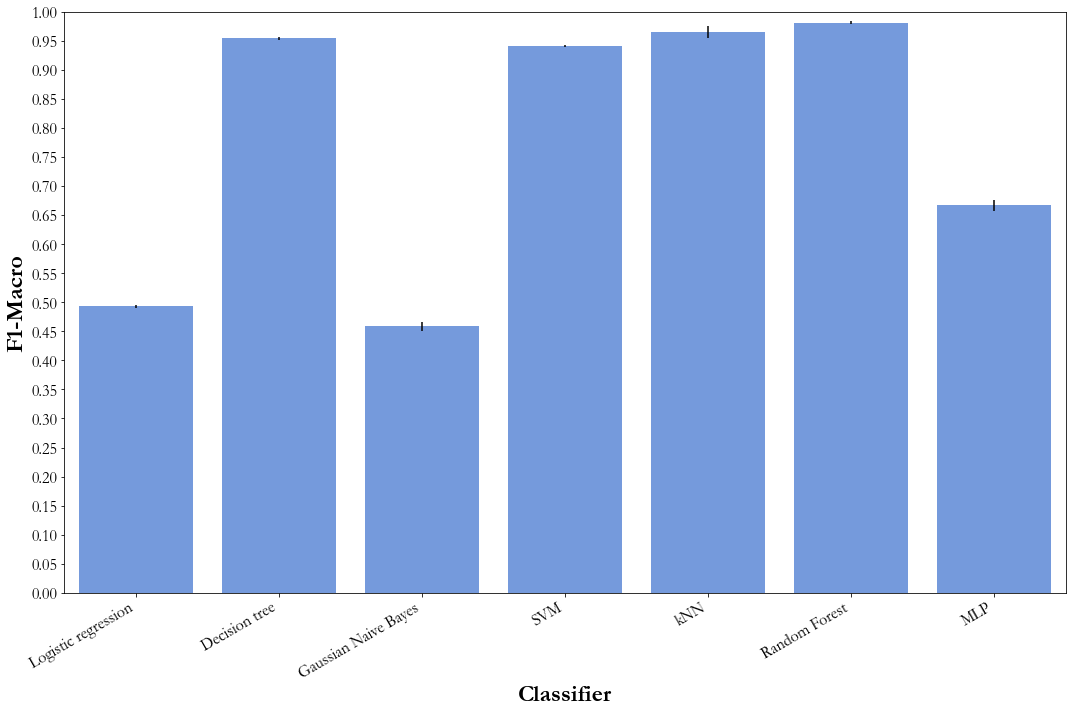

In [5]:
# INITIALIZE CLASS WEIGHTS BASED ON CLASS PROPORTIONS
class_weight = {
    "LowCongestionCondition": 1 / ((len(Y[Y["traffic"] == "LowCongestionCondition"].index)) / (len(Y.index))),
    "NormalCongestionCondition": 1 / ((len(Y[Y["traffic"] == "NormalCongestionCondition"].index)) / (len(Y.index))),
    "HighCongestionCondition": 1 / ((len(Y[Y["traffic"] == "HighCongestionCondition"].index)) / (len(Y.index))),
    }

# INITIALIZE SAMPLE WEIGHTS BASED ON CLASS PROPORTIONS
sample_weight = np.array([class_weight[label] for label in Y["traffic"]])

# FEATURES SELECTED FOR TRAFFIC PREDICTION
features_traffic = ["VehicleSpeedAverage", "EngineCoolantTemperature", "EngineRPM", "FuelConsumptionAverage", "LongitudinalAcceleration", "VehicleSpeedVariance"]

# MODEL 1: LOGISTIC REGRESSION WITH K-FOLD CROSS-VALIDATION 
logit_f1, logit, y_test_logit, y_pred_logit = logistic_regression_cv(X[features_traffic], Y["traffic"], 5, [class_weight])

# MODEL 2: DECISION TREE WITH K-FOLD CROSS-VALIDATION
dt_f1, dt, y_test_dt, y_pred_dt = decision_tree_cv(X[features_traffic], Y["traffic"], 5, [class_weight])

# MODEL 3: GAUSSIAN NAIVE BAYES WITH K-FOLD CROSS-VALIDATION
nb_f1, nb, y_test_nb, y_pred_nb = gaussian_naive_bayes_cv(X[features_traffic], Y["traffic"], 5, sample_weight)

# MODEL 4: SUPPORT VECTOR MACHINE WITH K-FOLD CROSS-VALIDATION
svm_f1, svm, y_test_svm, y_pred_svm = svm_cv(X[features_traffic], Y["traffic"], 5, [class_weight])

# MODEL 5: K-NN CLASSIFIER WITH K-FOLD CROSS-VALIDATION
knn_f1, knn, y_test_knn, y_pred_knn = knn_cv(X[features_traffic], Y["traffic"], 5)

# MODEL 6: RANDOM FOREST WITH K-FOLD CROSS-VALIDATION
rf_f1, rf, y_test_rf, y_pred_rf = randomforest_cv(X[features_traffic], Y["traffic"], 5, [class_weight])

# MODEL 7: MULTILAYER PERCEPTRON WITH K-FOLD CROSS-VALIDATION
mlp_f1, mlp, y_test_mlp, y_pred_mlp = mlp_cv(X[features_traffic], Y["traffic"], 5)

# PLOT CONFUSION MATRICES AND PRINT PERFORMANCE METRICS
classification_results(logit_f1, y_test_logit, y_pred_logit, "Logistic regression")
classification_results(dt_f1, y_test_dt, y_pred_dt, "Decision tree")
classification_results(nb_f1, y_test_nb, y_pred_nb, "Gaussian Naive Bayes")
classification_results(svm_f1, y_test_svm, y_pred_svm, "SVM")
classification_results(knn_f1, y_test_knn, y_pred_knn, "kNN")
classification_results(rf_f1, y_test_rf, y_pred_rf, "Random Forest")
classification_results(mlp_f1, y_test_mlp, y_pred_mlp, "MLP")

# CREATE THE SUBPLOT AND MAKE NECESSARY VISUAL CHANGES
fig5, ax5 = plt.subplots(1, 1, figsize=(15,10))
sns.barplot(ax=ax5, \
    x=["Logistic regression", "Decision tree", "Gaussian Naive Bayes", "SVM", "kNN", "Random Forest", "MLP"], \
    y=[np.mean(logit_f1), np.mean(dt_f1), np.mean(nb_f1), np.mean(svm_f1), np.mean(knn_f1), np.mean(rf_f1), np.mean(mlp_f1)], \
    yerr=[np.std(logit_f1), np.std(dt_f1), np.std(nb_f1), np.std(svm_f1), np.std(knn_f1), np.std(rf_f1), np.std(mlp_f1)], \
    color="cornflowerblue")
ax5.set_xlabel("Classifier", fontsize=24, fontweight="bold", fontname="Garamond")
ax5.set_ylabel("F1-Macro", fontsize=24, fontweight="bold", fontname="Garamond")
ax5.tick_params(axis='both', which='major', labelsize=16)
ax5.locator_params(axis='y', nbins=20)
ax5.set_ylim([0, 1])
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=30, ha="right", fontsize=16)
for tick in ax5.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax5.get_yticklabels():
    tick.set_fontname("Garamond")

# TIGHT LAYOUT FOR ALL FIGURES
fig5.tight_layout()

##### **DRIVING STYLE PREDICTION**


Running K-fold CV (LogisticRegression())!
Finished K-fold CV (LogisticRegression())!

Running K-fold CV (DecisionTreeClassifier())!
Finished K-fold CV (DecisionTreeClassifier())!

Running K-fold CV (GaussianNB())!
Finished K-fold CV (GaussianNB())!

Running K-fold CV (SVC())!
Finished K-fold CV (SVC())!

Running K-fold CV (KNeighborsClassifier())!
Finished K-fold CV (KNeighborsClassifier())!

Running K-fold CV (RandomForestClassifier())!
Finished K-fold CV (RandomForestClassifier())!

Running K-fold CV (KNeighborsClassifier())!
Finished K-fold CV (KNeighborsClassifier())!
Macro-F1 (Logistic regression): 0.524 ± 0.004
Macro-F1 (Decision tree): 0.819 ± 0.007
Macro-F1 (Gaussian Naive Bayes): 0.501 ± 0.006
Macro-F1 (SVM): 0.743 ± 0.005
Macro-F1 (kNN): 0.789 ± 0.017
Macro-F1 (Random Forest): 0.835 ± 0.007
Macro-F1 (MLP): 0.772 ± 0.038


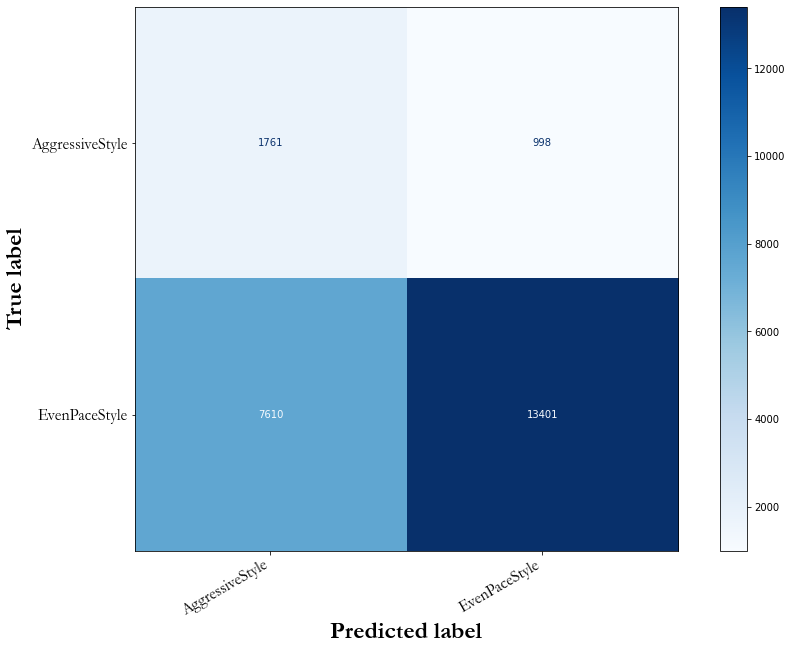

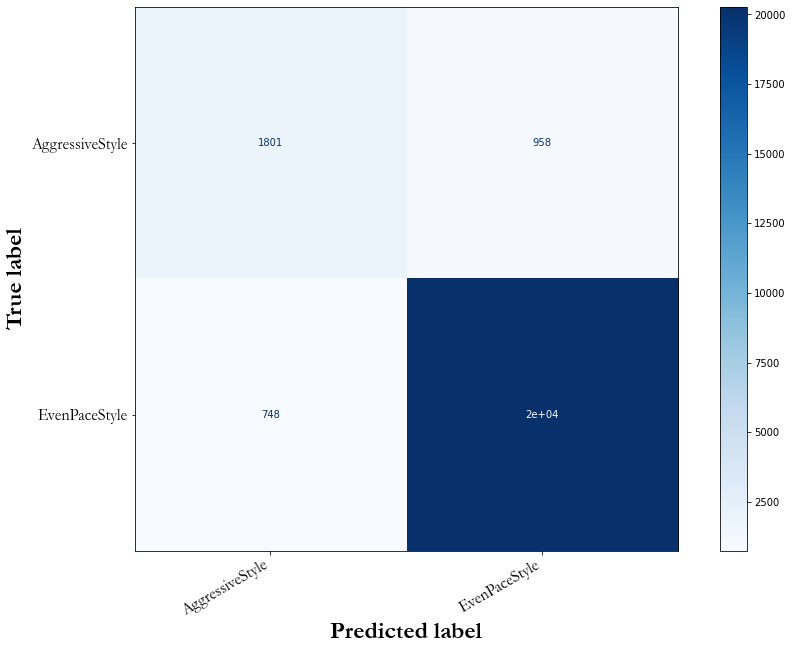

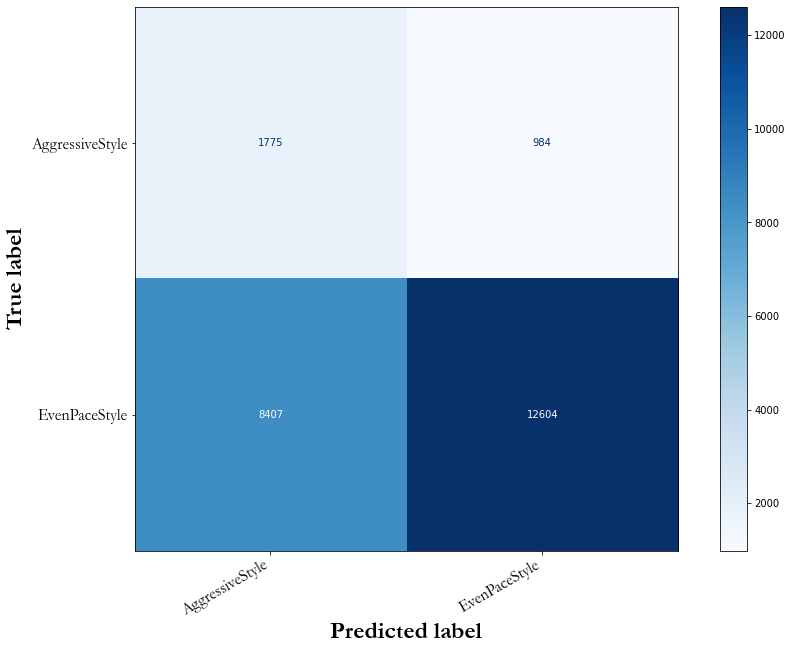

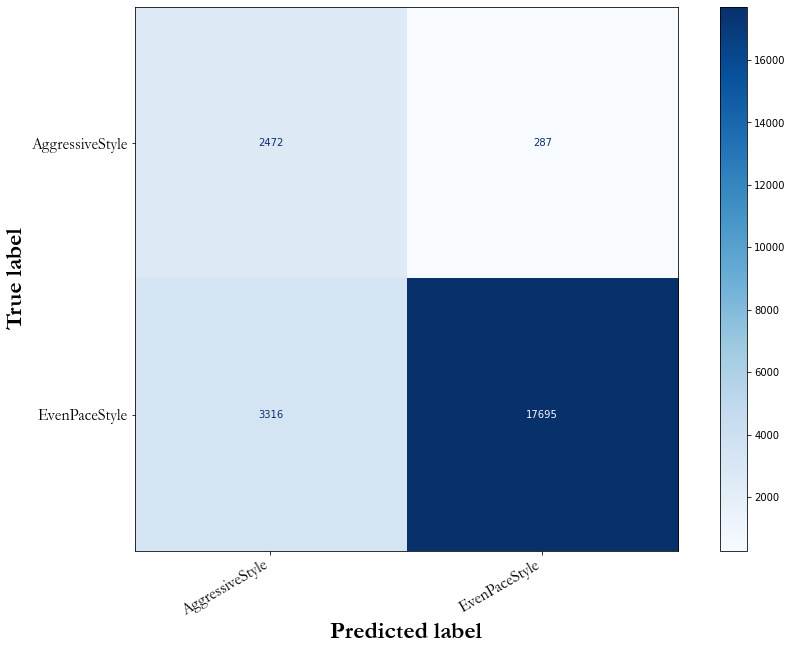

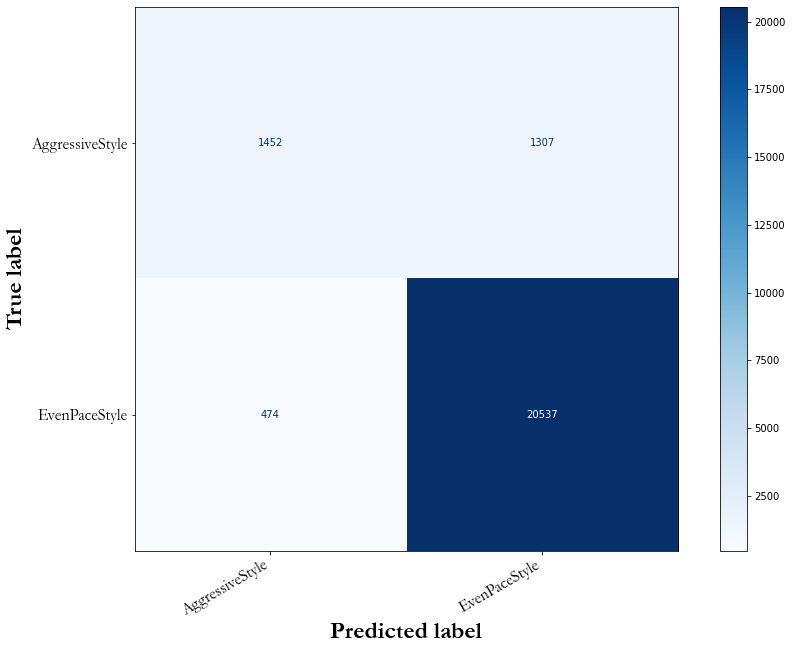

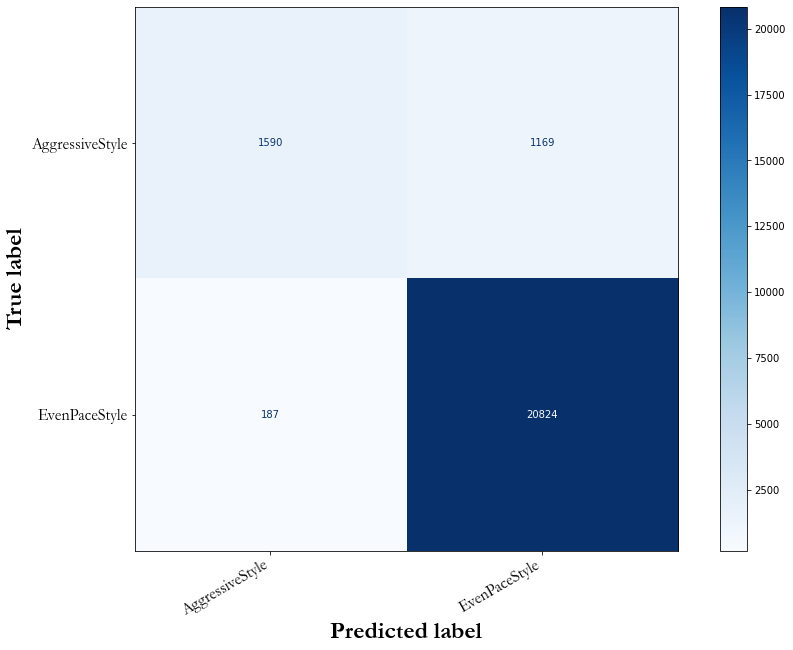

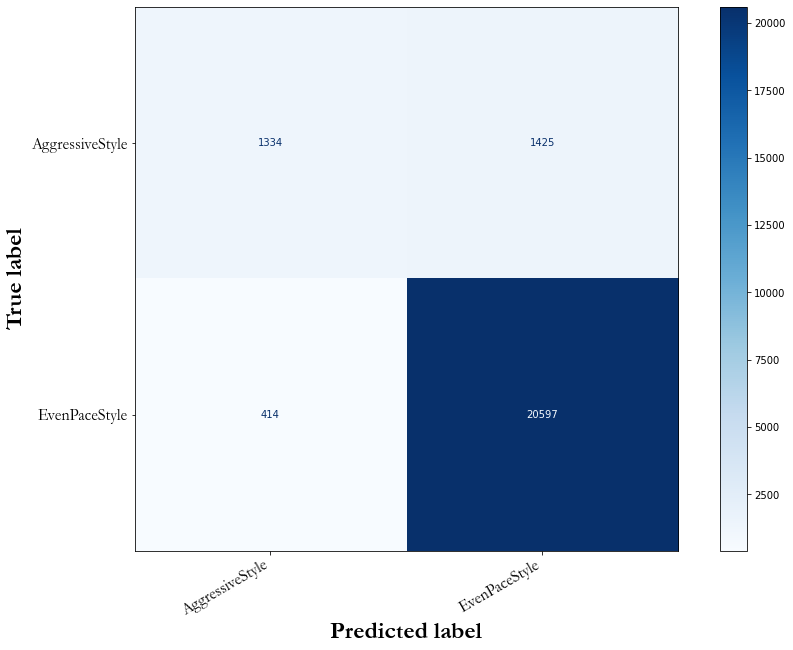

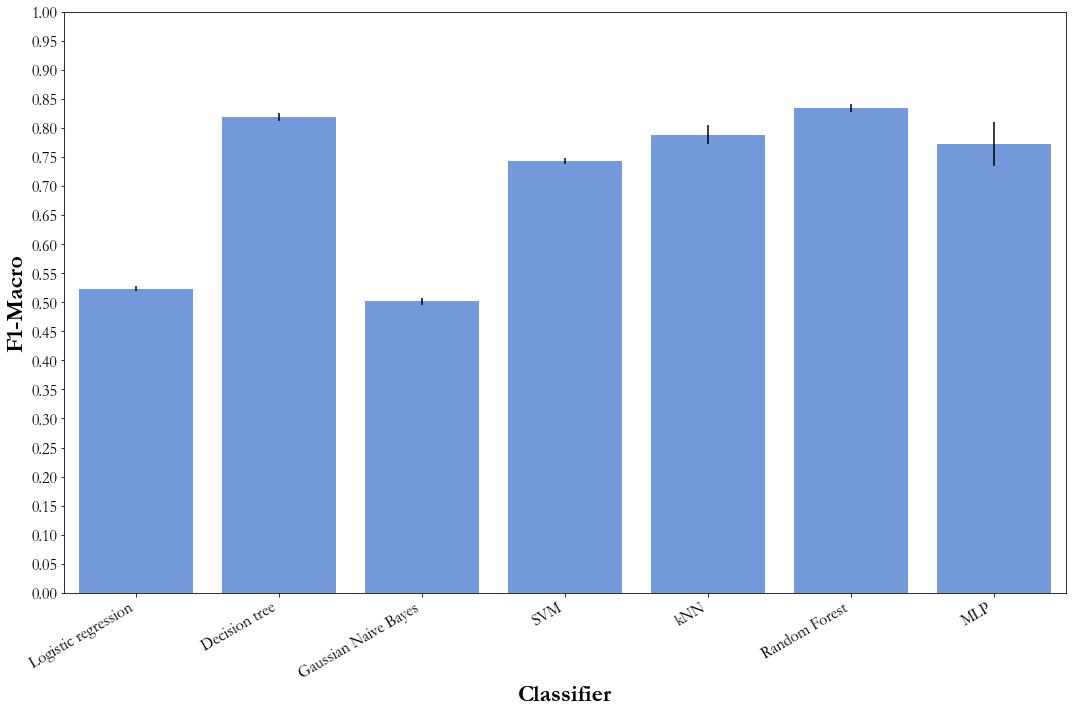

In [6]:
# INITIALIZE CLASS WEIGHTS BASED ON CLASS PROPORTIONS
class_weight = {
    "EvenPaceStyle": 1 / ((len(Y[Y["drivingStyle"] == "EvenPaceStyle"].index)) / (len(Y.index))),
    "AggressiveStyle": 1 / ((len(Y[Y["drivingStyle"] == "AggressiveStyle"].index)) / (len(Y.index))),
    }

# INITIALIZE SAMPLE WEIGHTS BASED ON CLASS PROPORTIONS
sample_weight = np.array([class_weight[label] for label in Y["drivingStyle"]])

# FEATURES SELECTED FOR DRIVING STYLE PREDICTION
features_drivingStyle = ["VehicleSpeedAverage", "VehicleSpeedVariance", "FuelConsumptionAverage", "VerticalAcceleration", "LongitudinalAcceleration", "EngineRPM"]

# MODEL 1: LOGISTIC REGRESSION WITH K-FOLD CROSS-VALIDATION 
logit_f1, logit, y_test_logit, y_pred_logit = logistic_regression_cv(X[features_drivingStyle], Y["drivingStyle"], 5, [class_weight])

# MODEL 2: DECISION TREE WITH K-FOLD CROSS-VALIDATION
dt_f1, dt, y_test_dt, y_pred_dt = decision_tree_cv(X[features_drivingStyle], Y["drivingStyle"], 5, [class_weight])

# MODEL 3: GAUSSIAN NAIVE BAYES WITH K-FOLD CROSS-VALIDATION
nb_f1, nb, y_test_nb, y_pred_nb = gaussian_naive_bayes_cv(X[features_drivingStyle], Y["drivingStyle"], 5, sample_weight)

# MODEL 4: SUPPORT VECTOR MACHINE WITH K-FOLD CROSS-VALIDATION
svm_f1, svm, y_test_svm, y_pred_svm = svm_cv(X[features_drivingStyle], Y["drivingStyle"], 5, [class_weight])

# MODEL 5: K-NN CLASSIFIER WITH K-FOLD CROSS-VALIDATION
knn_f1, knn, y_test_knn, y_pred_knn = knn_cv(X[features_drivingStyle], Y["drivingStyle"], 5)

# MODEL 6: RANDOM FOREST WITH K-FOLD CROSS-VALIDATION
rf_f1, rf, y_test_rf, y_pred_rf = randomforest_cv(X[features_drivingStyle], Y["drivingStyle"], 5, [class_weight])

# MODEL 5: MULTILAYER PERCEPTRON WITH K-FOLD CROSS-VALIDATION
mlp_f1, mlp, y_test_mlp, y_pred_mlp = knn_cv(X[features_drivingStyle], Y["drivingStyle"], 5)

# PLOT CONFUSION MATRICES AND PRINT PERFORMANCE METRICS
classification_results(logit_f1, y_test_logit, y_pred_logit, "Logistic regression")
classification_results(dt_f1, y_test_dt, y_pred_dt, "Decision tree")
classification_results(nb_f1, y_test_nb, y_pred_nb, "Gaussian Naive Bayes")
classification_results(svm_f1, y_test_svm, y_pred_svm, "SVM")
classification_results(knn_f1, y_test_knn, y_pred_knn, "kNN")
classification_results(rf_f1, y_test_rf, y_pred_rf, "Random Forest")
classification_results(mlp_f1, y_test_mlp, y_pred_mlp, "MLP")

# CREATE THE SUBPLOT AND MAKE NECESSARY VISUAL CHANGES
fig6, ax6 = plt.subplots(1, 1, figsize=(15,10))
sns.barplot(ax=ax6, \
    x=["Logistic regression", "Decision tree", "Gaussian Naive Bayes", "SVM", "kNN", "Random Forest", "MLP"], \
    y=[np.mean(logit_f1), np.mean(dt_f1), np.mean(nb_f1), np.mean(svm_f1), np.mean(knn_f1), np.mean(rf_f1), np.mean(mlp_f1)], \
    yerr=[np.std(logit_f1), np.std(dt_f1), np.std(nb_f1), np.std(svm_f1), np.std(knn_f1), np.std(rf_f1), np.std(mlp_f1)], \
    color="cornflowerblue")
ax6.set_xlabel("Classifier", fontsize=24, fontweight="bold", fontname="Garamond")
ax6.set_ylabel("F1-Macro", fontsize=24, fontweight="bold", fontname="Garamond")
ax6.tick_params(axis='both', which='major', labelsize=16)
ax6.locator_params(axis='y', nbins=20)
ax6.set_ylim([0, 1])
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=30, ha="right", fontsize=16)
for tick in ax6.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax6.get_yticklabels():
    tick.set_fontname("Garamond")

# TIGHT LAYOUT FOR ALL FIGURES
fig6.tight_layout()

##### **ROAD SURFACE CONDITION PREDICTION**


Running K-fold CV (LogisticRegression())!
Finished K-fold CV (LogisticRegression())!

Running K-fold CV (DecisionTreeClassifier())!
Finished K-fold CV (DecisionTreeClassifier())!

Running K-fold CV (GaussianNB())!
Finished K-fold CV (GaussianNB())!

Running K-fold CV (SVC())!
Finished K-fold CV (SVC())!

Running K-fold CV (KNeighborsClassifier())!
Finished K-fold CV (KNeighborsClassifier())!

Running K-fold CV (RandomForestClassifier())!
Finished K-fold CV (RandomForestClassifier())!

Running K-fold CV (KNeighborsClassifier())!
Finished K-fold CV (KNeighborsClassifier())!
Macro-F1 (Logistic regression): 0.689 ± 0.006
Macro-F1 (Decision tree): 0.972 ± 0.002
Macro-F1 (Gaussian Naive Bayes): 0.603 ± 0.008
Macro-F1 (SVM): 0.947 ± 0.004
Macro-F1 (kNN): 0.966 ± 0.004
Macro-F1 (Random Forest): 0.986 ± 0.002
Macro-F1 (MLP): 0.967 ± 0.006


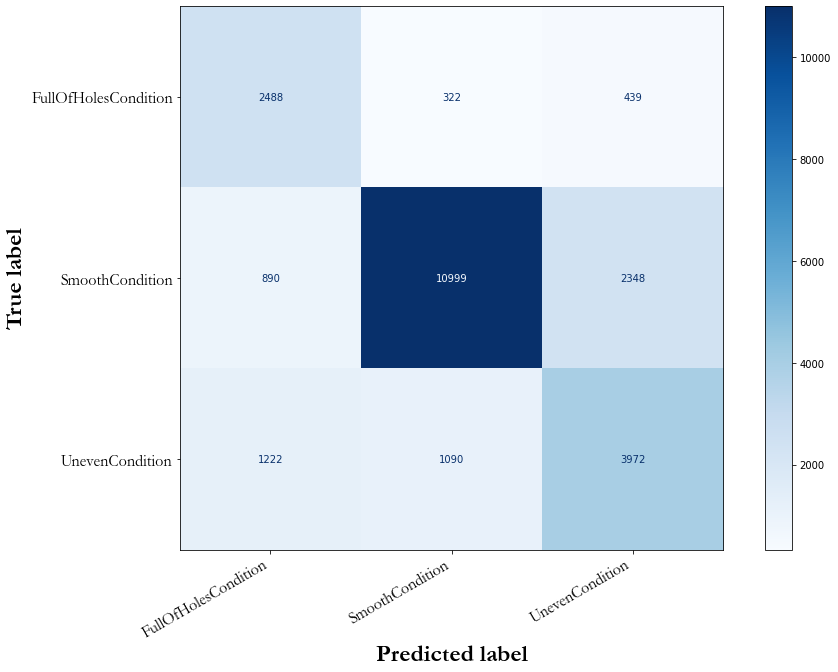

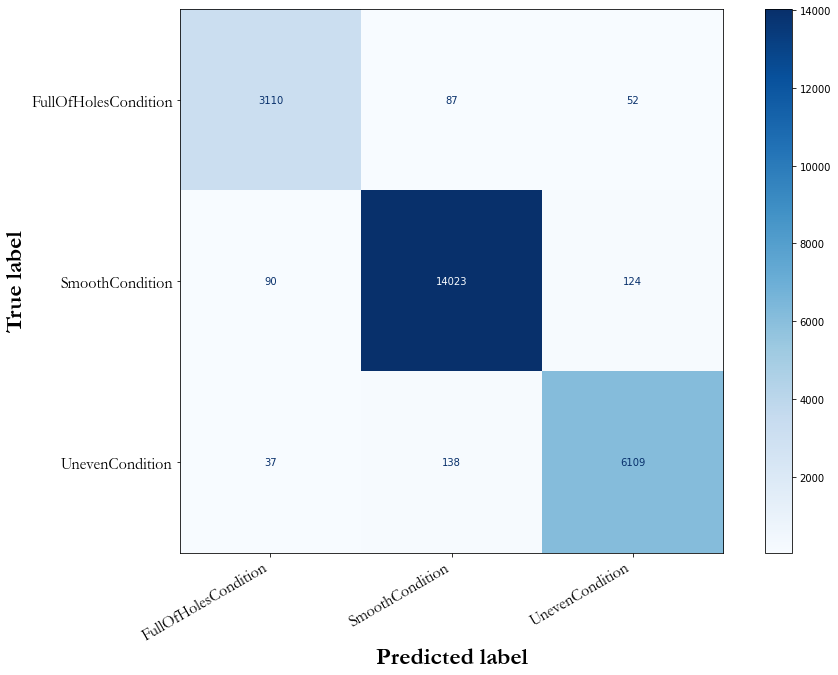

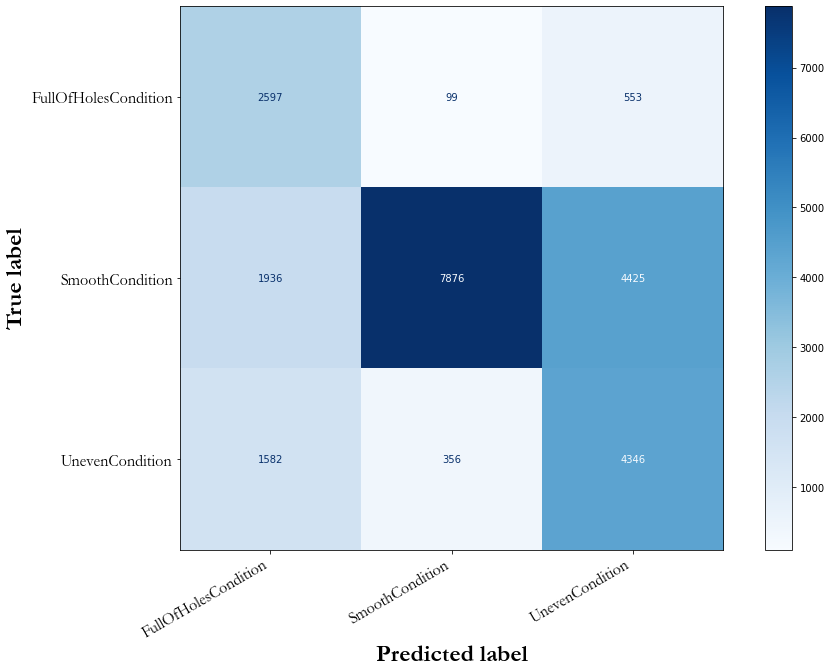

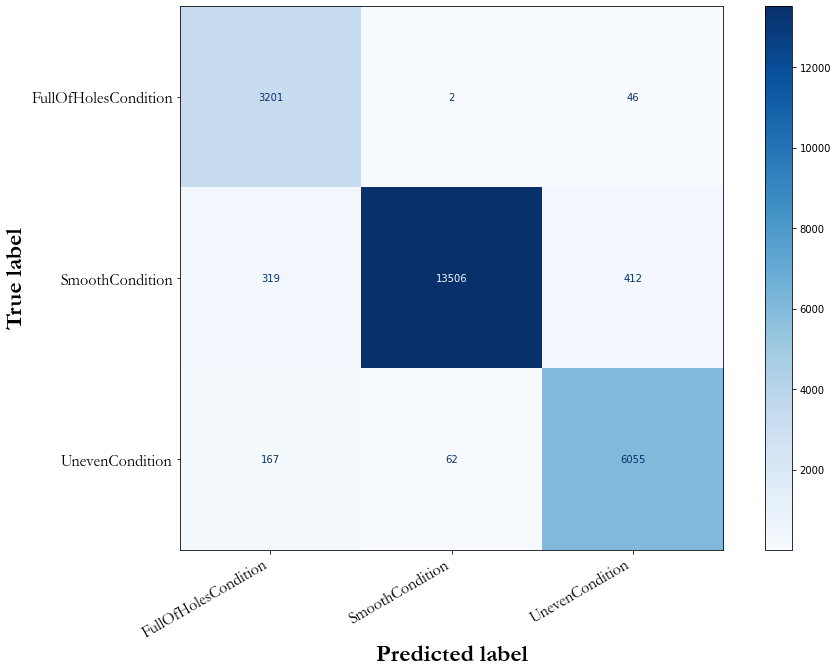

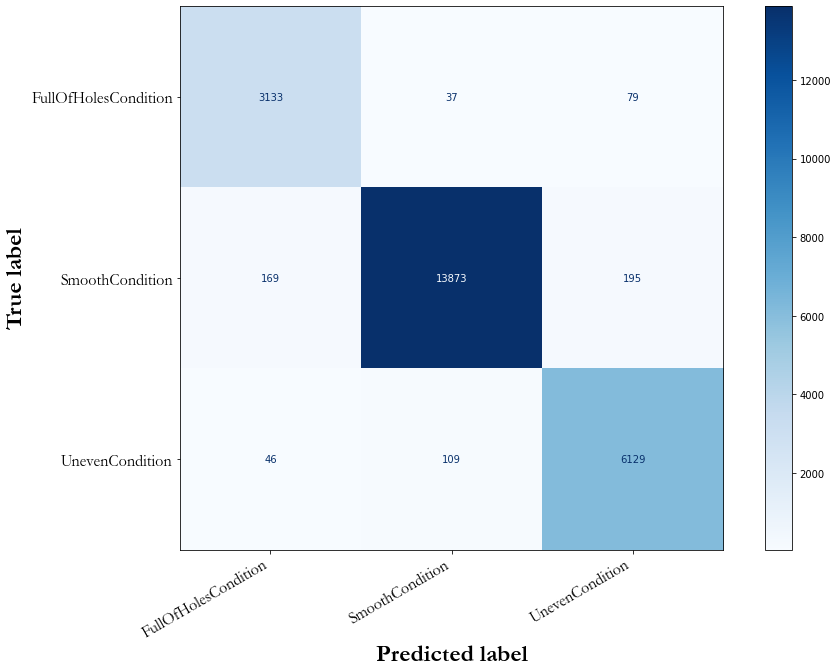

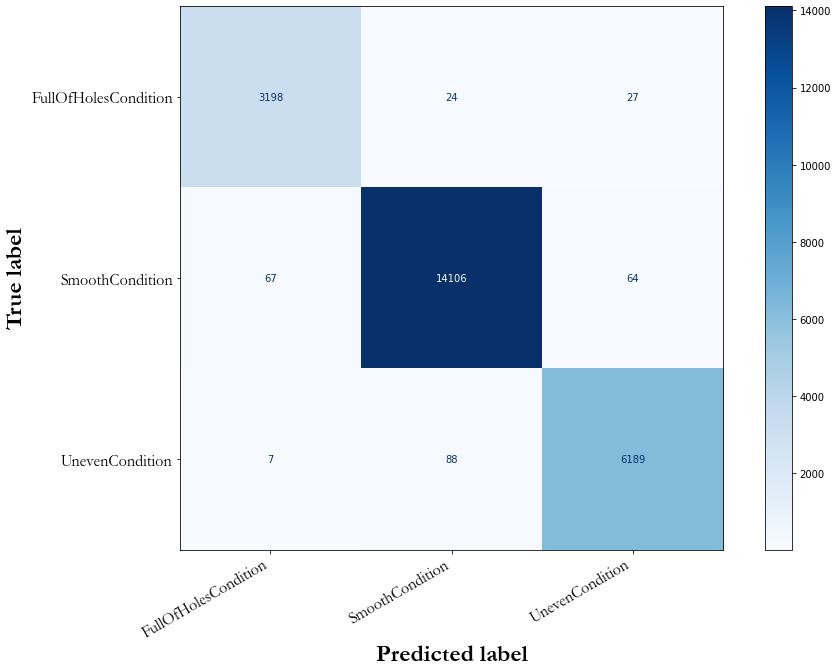

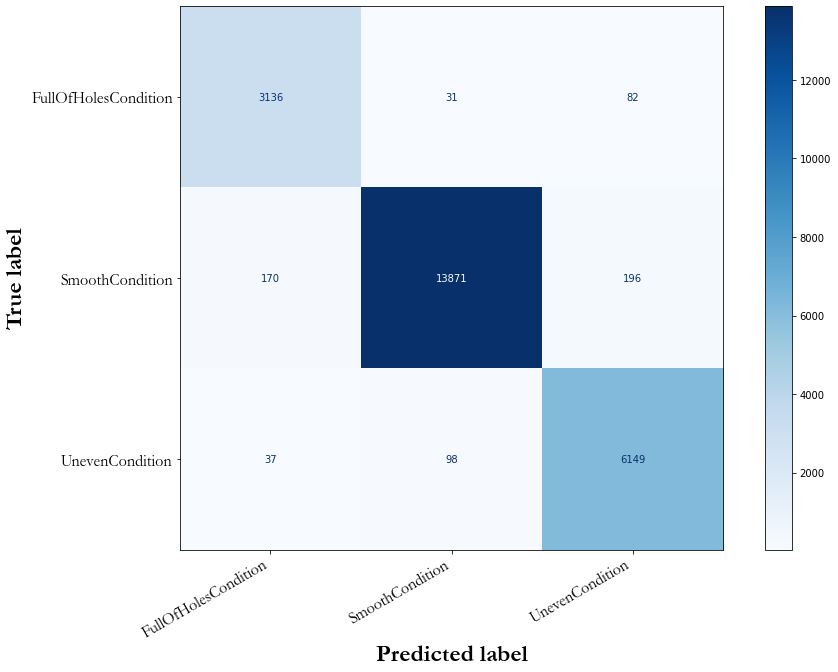

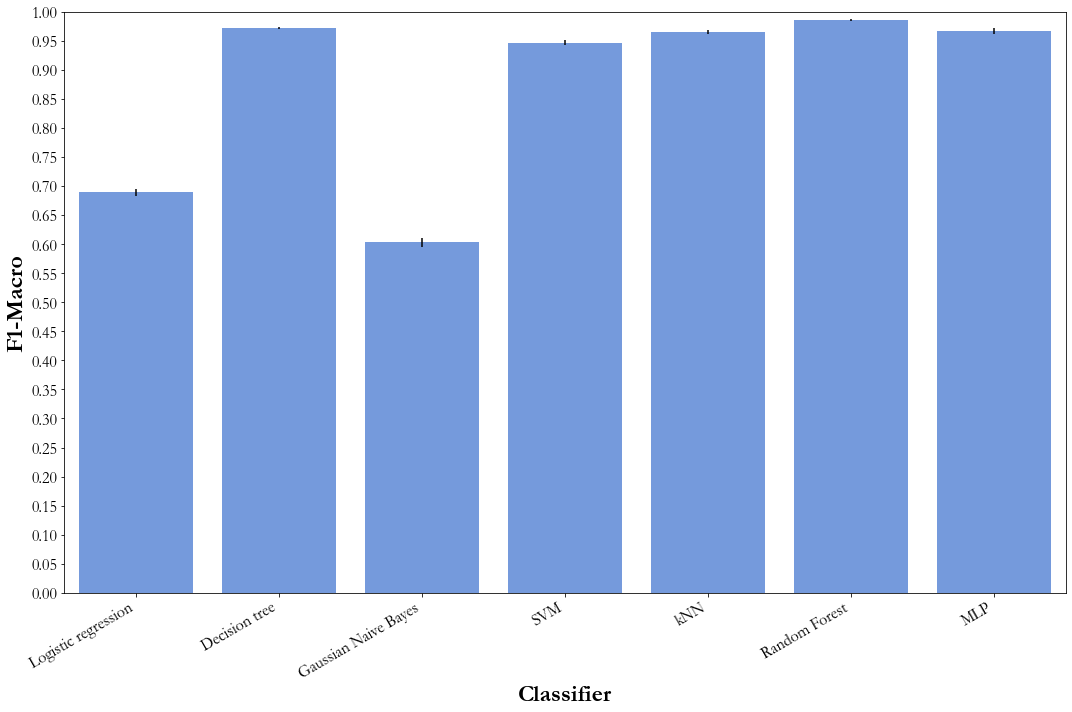

In [7]:
# INITIALIZE CLASS WEIGHTS BASED ON CLASS PROPORTIONS
class_weight = {
    "SmoothCondition": 1 / ((len(Y[Y["roadSurface"] == "SmoothCondition"].index)) / (len(Y.index))),
    "UnevenCondition": 1 / ((len(Y[Y["roadSurface"] == "UnevenCondition"].index)) / (len(Y.index))),
    "FullOfHolesCondition": 1 / ((len(Y[Y["roadSurface"] == "FullOfHolesCondition"].index)) / (len(Y.index))),
    }

# INITIALIZE SAMPLE WEIGHTS BASED ON CLASS PROPORTIONS
sample_weight = np.array([class_weight[label] for label in Y["roadSurface"]])

# FEATURES SELECTED FOR ROAD SURFACE CONDITION PREDICTION
features_roadSurface = ["VehicleSpeedAverage", "EngineCoolantTemperature", "EngineRPM", "IntakeAirTemperature", "FuelConsumptionAverage", "ManifoldAbsolutePressure"]

# MODEL 1: LOGISTIC REGRESSION WITH K-FOLD CROSS-VALIDATION 
logit_f1, logit, y_test_logit, y_pred_logit = logistic_regression_cv(X[features_roadSurface], Y["roadSurface"], 5, [class_weight])

# MODEL 2: DECISION TREE WITH K-FOLD CROSS-VALIDATION
dt_f1, dt, y_test_dt, y_pred_dt = decision_tree_cv(X[features_roadSurface], Y["roadSurface"], 5, [class_weight])

# MODEL 3: GAUSSIAN NAIVE BAYES WITH K-FOLD CROSS-VALIDATION
nb_f1, nb, y_test_nb, y_pred_nb = gaussian_naive_bayes_cv(X[features_roadSurface], Y["roadSurface"], 5, sample_weight)

# MODEL 4: SUPPORT VECTOR MACHINE WITH K-FOLD CROSS-VALIDATION
svm_f1, svm, y_test_svm, y_pred_svm = svm_cv(X[features_roadSurface], Y["roadSurface"], 5, [class_weight])

# MODEL 5: K-NN CLASSIFIER WITH K-FOLD CROSS-VALIDATION
knn_f1, knn, y_test_knn, y_pred_knn = knn_cv(X[features_roadSurface], Y["roadSurface"], 5)

# MODEL 6: RANDOM FOREST WITH K-FOLD CROSS-VALIDATION
rf_f1, rf, y_test_rf, y_pred_rf = randomforest_cv(X[features_roadSurface], Y["roadSurface"], 5, [class_weight])

# MODEL 5: MULTILAYER PERCEPTRON WITH K-FOLD CROSS-VALIDATION
mlp_f1, mlp, y_test_mlp, y_pred_mlp = knn_cv(X[features_roadSurface], Y["roadSurface"], 5)

# PLOT CONFUSION MATRICES AND PRINT PERFORMANCE METRICS
classification_results(logit_f1, y_test_logit, y_pred_logit, "Logistic regression")
classification_results(dt_f1, y_test_dt, y_pred_dt, "Decision tree")
classification_results(nb_f1, y_test_nb, y_pred_nb, "Gaussian Naive Bayes")
classification_results(svm_f1, y_test_svm, y_pred_svm, "SVM")
classification_results(knn_f1, y_test_knn, y_pred_knn, "kNN")
classification_results(rf_f1, y_test_rf, y_pred_rf, "Random Forest")
classification_results(mlp_f1, y_test_mlp, y_pred_mlp, "MLP")

# CREATE THE SUBPLOT AND MAKE NECESSARY VISUAL CHANGES
fig7, ax7 = plt.subplots(1, 1, figsize=(15,10))
sns.barplot(ax=ax7, \
    x=["Logistic regression", "Decision tree", "Gaussian Naive Bayes", "SVM", "kNN", "Random Forest", "MLP"], \
    y=[np.mean(logit_f1), np.mean(dt_f1), np.mean(nb_f1), np.mean(svm_f1), np.mean(knn_f1), np.mean(rf_f1), np.mean(mlp_f1)], \
    yerr=[np.std(logit_f1), np.std(dt_f1), np.std(nb_f1), np.std(svm_f1), np.std(knn_f1), np.std(rf_f1), np.std(mlp_f1)], \
    color="cornflowerblue")
ax7.set_xlabel("Classifier", fontsize=24, fontweight="bold", fontname="Garamond")
ax7.set_ylabel("F1-Macro", fontsize=24, fontweight="bold", fontname="Garamond")
ax7.tick_params(axis='both', which='major', labelsize=16)
ax7.locator_params(axis='y', nbins=20)
ax7.set_ylim([0, 1])
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=30, ha="right", fontsize=16)
for tick in ax7.get_xticklabels():
    tick.set_fontname("Garamond")
for tick in ax7.get_yticklabels():
    tick.set_fontname("Garamond")

# TIGHT LAYOUT FOR ALL FIGURES
fig7.tight_layout()